In [71]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tabulate import tabulate
import copy

In [72]:

class Drone:
    def __init__(self, position, velocity, bounds, obstacle_position):
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.best_position = self.position.copy()
        self.bounds = bounds
        self.obstacle_position = np.array(obstacle_position)

    def update_position(self, drones):
        self.position += self.velocity

        # Check for collisions with boundaries
        for i in range(2):
            if self.position[i] < self.bounds[i][0]:
                self.position[i] = self.bounds[i][0]
            elif self.position[i] > self.bounds[i][1]:
                self.position[i] = self.bounds[i][1]

        # Check for collisions with other drones
        for other_drone in drones:
            if other_drone != self:
                distance = np.linalg.norm(self.position - other_drone.position)
                if distance < 0.1:
                    # If collision detected, adjusting position
                    direction = self.position - other_drone.position
                    direction /= np.linalg.norm(direction)
                    self.position += direction

        # Check for collisions with obstacle
        distance_to_obstacle = np.linalg.norm(self.position - self.obstacle_position)
        if distance_to_obstacle < 0.1:
            # If collision detected, adjusting position
            direction = self.position - self.obstacle_position
            direction /= np.linalg.norm(direction)
            self.position += direction

    def update_velocity(self, global_best_position, w, c1, c2):
        r1 = np.random.rand(2)
        r2 = np.random.rand(2)
        cognitive_velocity = c1 * r1 * (self.best_position - self.position)
        social_velocity = c2 * r2 * (global_best_position - self.position)
        self.velocity = w * self.velocity + cognitive_velocity + social_velocity


In [73]:

class Swarm:
    def __init__(self, num_drones, bounds, obstacle_position, max_iter):
        self.num_drones = num_drones
        self.bounds = bounds
        self.obstacle_position = list(obstacle_position)
        self.max_iter = max_iter
        self.global_best_position = np.zeros(2)
        self.global_best_penalty = float('inf')
        self.drones = []
        for _ in range(self.num_drones):
            position = [np.random.uniform(self.bounds[i][0], self.bounds[i][1]) for i in range(2)]
            velocity = np.random.uniform(-1, 1, 2)
            drone = Drone(position, velocity, self.bounds, self.obstacle_position)
            self.drones.append(drone)
            if self.objective_function([drone]) < self.global_best_penalty:
                self.global_best_position = drone.position.copy()
                self.global_best_penalty = self.objective_function([drone])

    def objective_function(self, drones):
        total_distance = 0
        for drone in drones:
            distance_to_obstacle = np.linalg.norm(drone.position - self.obstacle_position)
            total_distance += distance_to_obstacle
        return total_distance

    def optimize(self):
        self.obstacle_position[0], self.obstacle_position[1] = update_obstacle_spiral(self.obstacle_position, update_rate = 0.1)

        # Check for collisions with boundaries
        for i in range(2):
            if self.obstacle_position[i] < self.bounds[i][0]:
                self.obstacle_position[i] = self.bounds[i][0]
            elif self.obstacle_position[i] > self.bounds[i][1]:
                self.obstacle_position[i] = self.bounds[i][1]

        # Updating local best
        for drone in self.drones:
            if self.objective_function([drone]) < self.objective_function([Drone(drone.best_position, [0, 0], self.bounds, self.obstacle_position)]):
                drone.best_position = drone.position.copy() # local best position

        # Updating the global best
        min_objectives = [self.objective_function([drone]) for drone in self.drones]
        min_global_objective = min(min_objectives)
        min_global_drone = self.drones[min_objectives.index(min_global_objective)]
        self.global_best_position = min_global_drone.position.copy()
        self.global_best_penalty = min_global_objective

        # drones position and velocity update
        for drone in self.drones:
            drone.update_velocity(self.global_best_position, w=0.5, c1=1.5, c2=1.5)
            drone.update_position(self.drones)

        total_distance = self.objective_function([drone])

        return self.global_best_position, self.global_best_penalty, total_distance



In [74]:
def update_obstacle_spiral(obstacle_position, update_rate):
    x, y = obstacle_position

    angle = np.arctan2(y, x) + update_rate

    radius = np.sqrt(x**2 + y**2)

    x_new = radius * np.cos(angle)
    y_new = radius * np.sin(angle)

    return x_new, y_new

In [75]:
import os

def plot_particles(swarm, iteration):

    plt.figure(figsize=(8, 8))

    for drone in swarm.drones:
        plt.scatter(drone.position[0], drone.position[1], color='blue', marker='o')

    plt.scatter(swarm.obstacle_position[0], swarm.obstacle_position[1], color='red', marker='x', label='Obstacle')
    plt.scatter(swarm.global_best_position[0], swarm.global_best_position[1], color='green', marker='*', label='Global Best')

    plt.xlim(swarm.bounds[0])
    plt.ylim(swarm.bounds[1])

    plt.title('Particle Positions - Iteration {}'.format(iteration))
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.savefig('./Animation3/fig{}.png'.format(str(iteration)))
    plt.show()

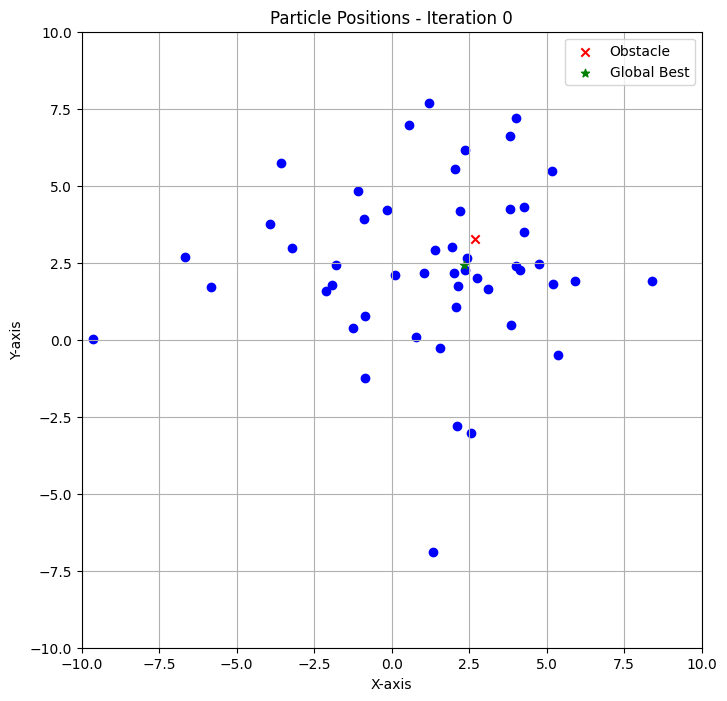

Best position: [2.34759503 2.4332138 ]
Best collision penalty: 0.915913721759921
total_distance: 1.4857300108794602


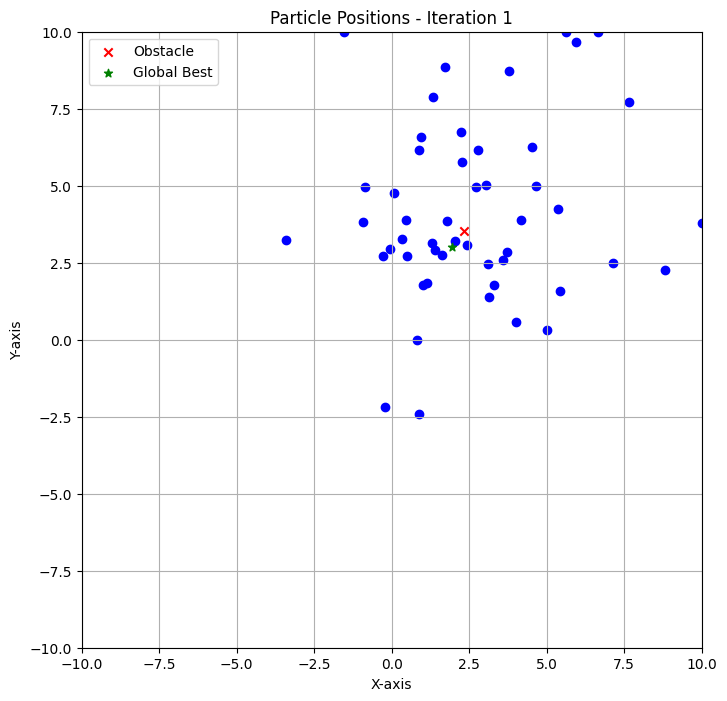

Best position: [1.95052247 2.99679872]
Best collision penalty: 0.6677855764877926
total_distance: 2.759681093046211


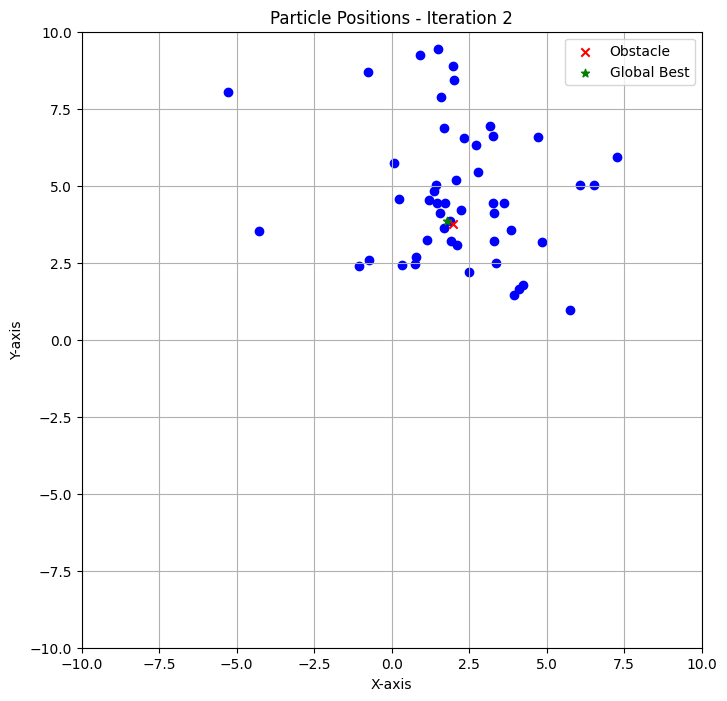

Best position: [1.7914939  3.85700638]
Best collision penalty: 0.21502093234981307
total_distance: 1.4392857930729877


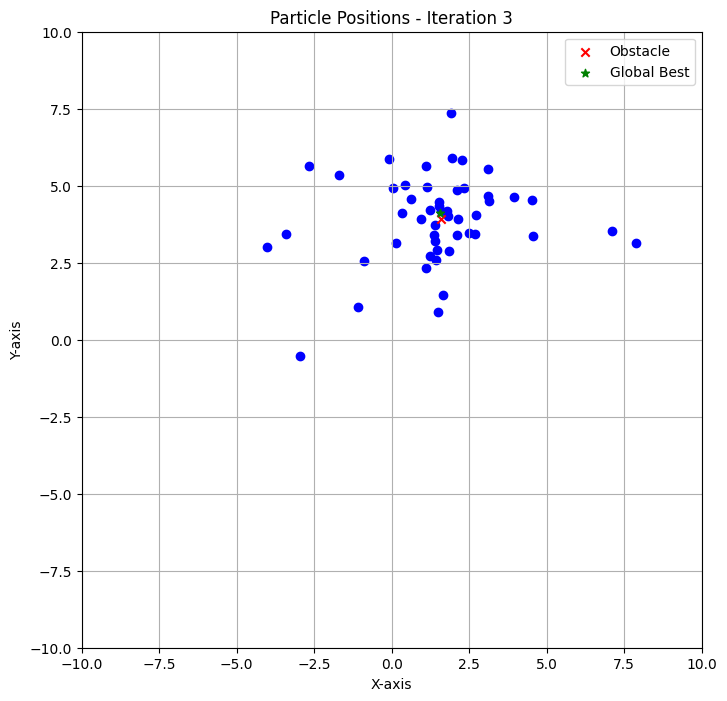

Best position: [1.56282274 4.11416669]
Best collision penalty: 0.18552767117019842
total_distance: 2.2229707217662638


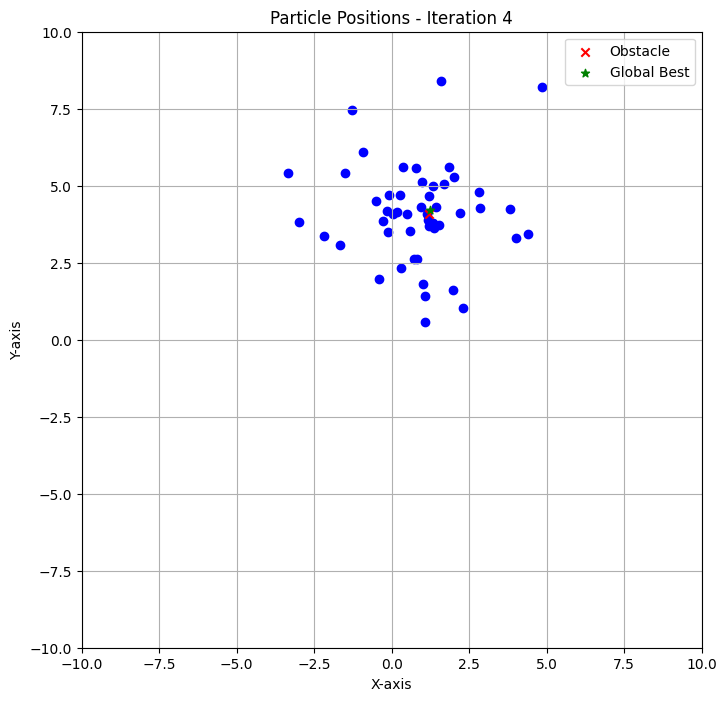

Best position: [1.22803443 4.20882762]
Best collision penalty: 0.14183178187918913
total_distance: 1.6805108768932362


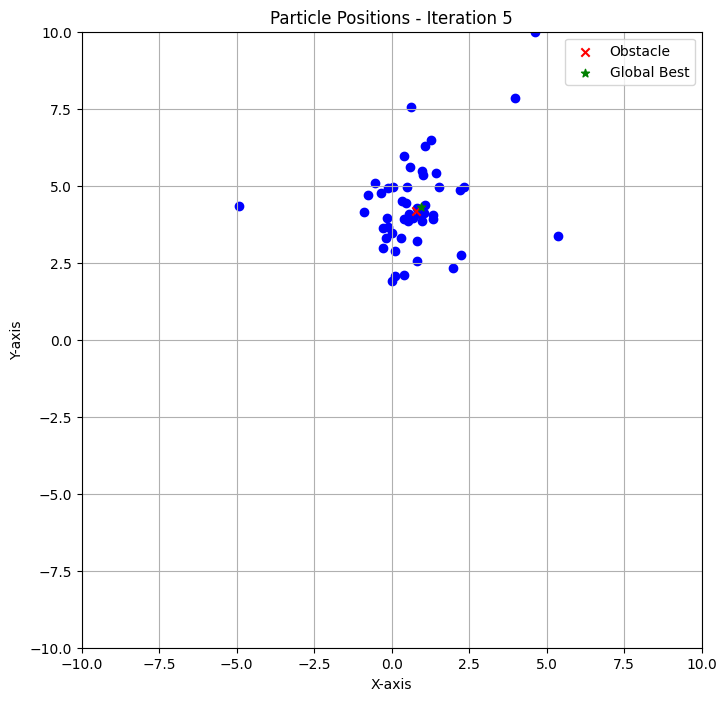

Best position: [0.94327177 4.31034068]
Best collision penalty: 0.21376841222646806
total_distance: 0.9743524912104846


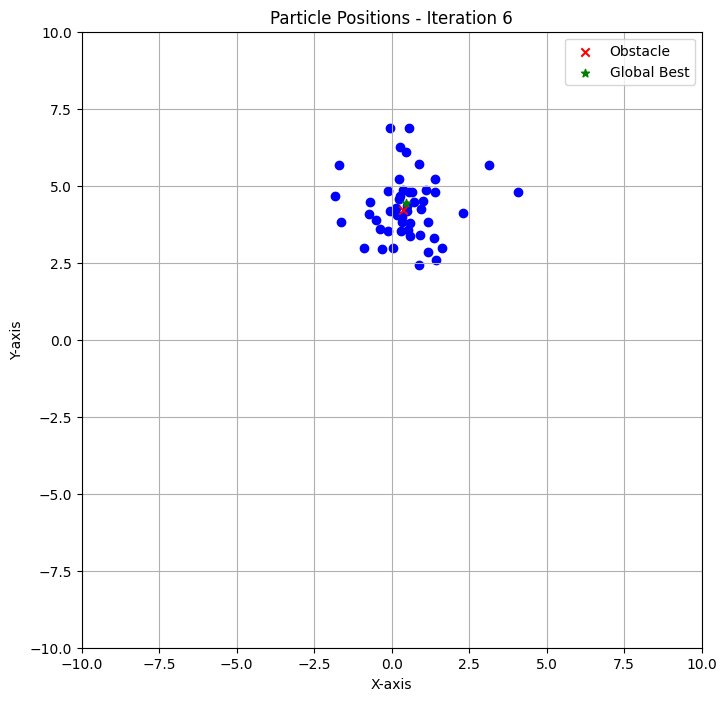

Best position: [0.46743859 4.45125773]
Best collision penalty: 0.24769938750085627
total_distance: 0.9615114832826588


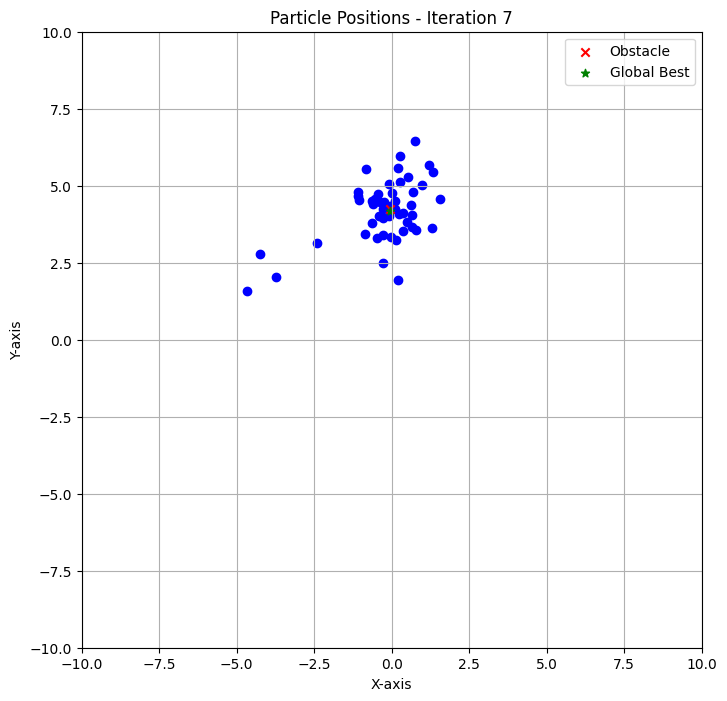

Best position: [-0.05343007  4.17855248]
Best collision penalty: 0.06420348627660427
total_distance: 0.6243531520849113


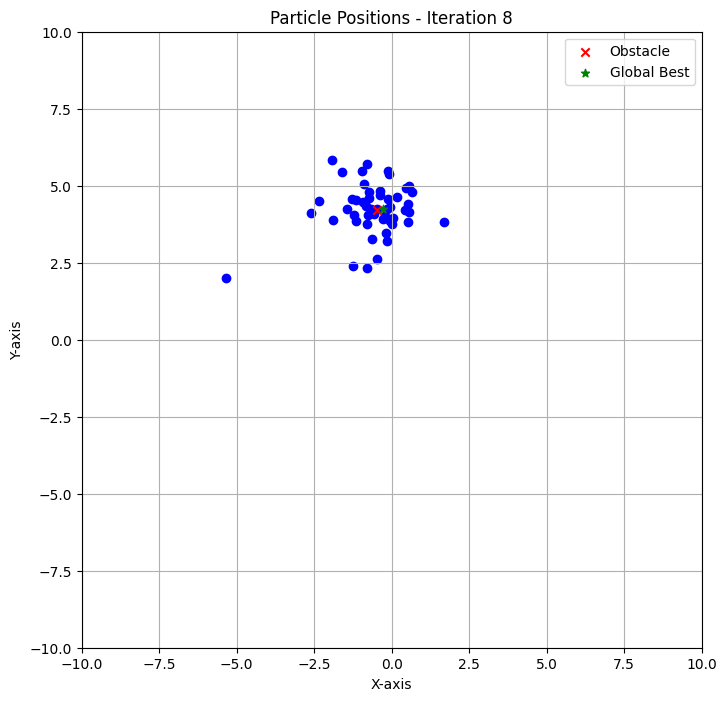

Best position: [-0.26762335  4.23072167]
Best collision penalty: 0.21810860208067867
total_distance: 1.5353238687144997


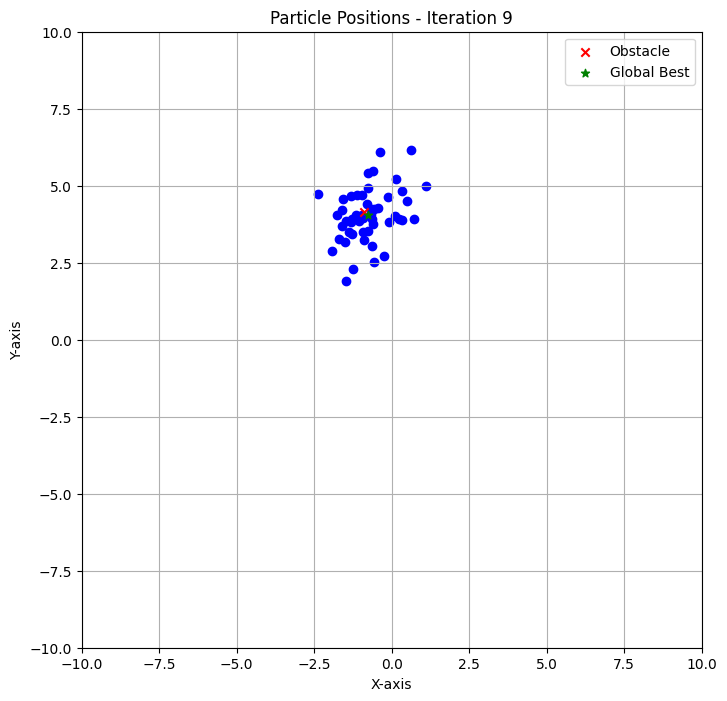

Best position: [-0.76898353  4.03563634]
Best collision penalty: 0.17357068314158944
total_distance: 0.25660716215599483


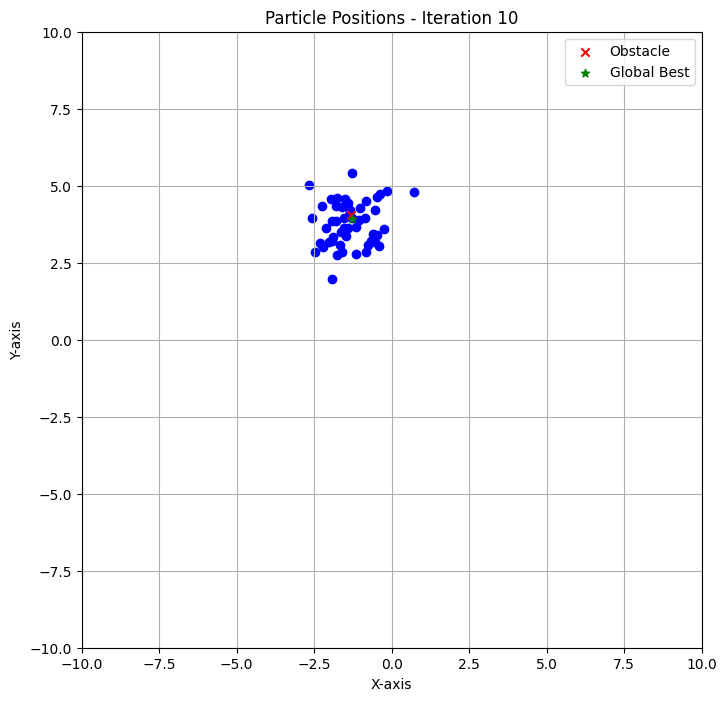

Best position: [-1.28618174  3.93545923]
Best collision penalty: 0.10247765973969994
total_distance: 1.1099535941804717


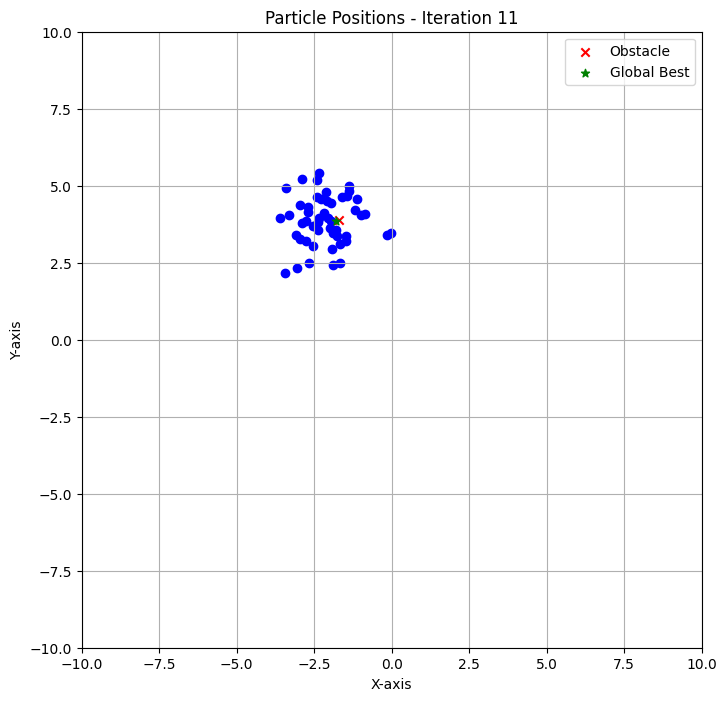

Best position: [-1.78241686  3.85409387]
Best collision penalty: 0.07893156756976462
total_distance: 0.33692610307918264


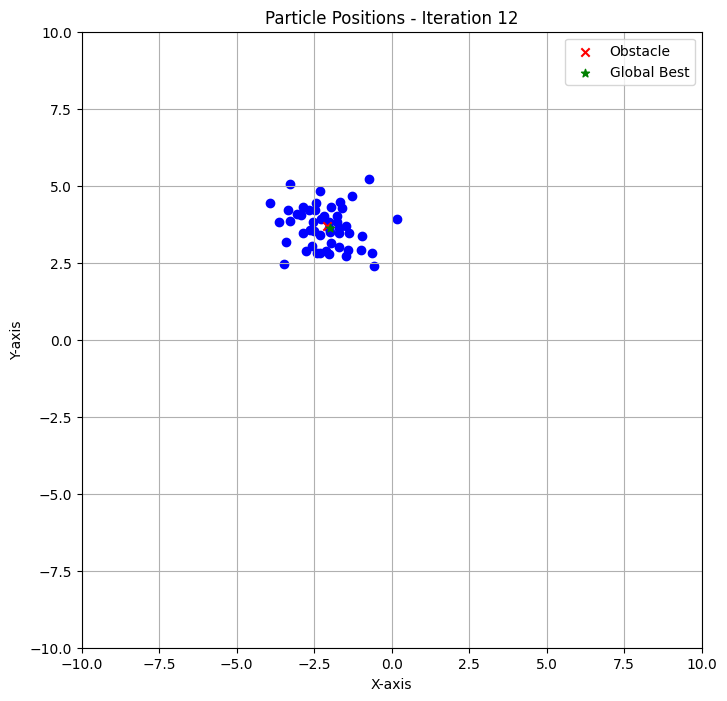

Best position: [-1.97884823  3.63589727]
Best collision penalty: 0.12342324791546984
total_distance: 0.7800129777658515


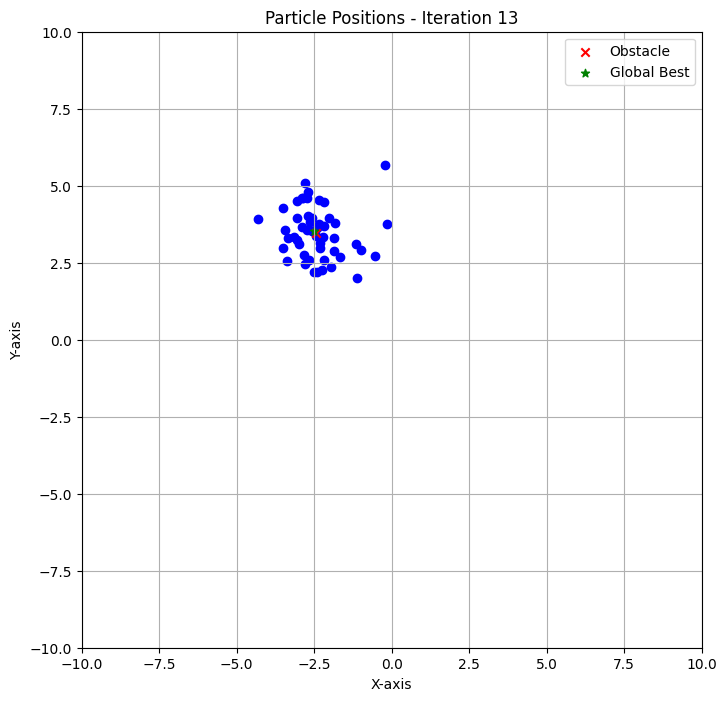

Best position: [-2.50464234  3.53820596]
Best collision penalty: 0.09254285602886692
total_distance: 1.072704233604815


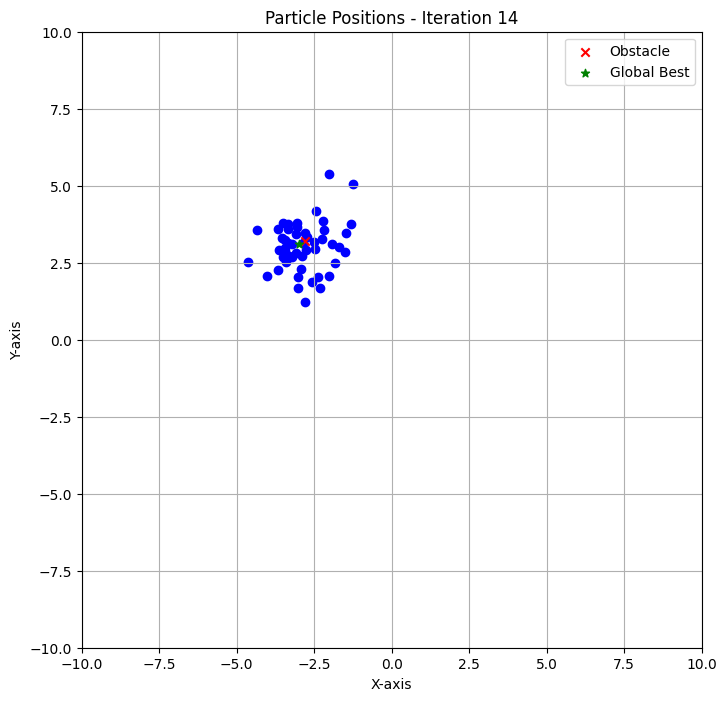

Best position: [-2.9834889   3.11811951]
Best collision penalty: 0.22088944140936703
total_distance: 0.3059762533948813


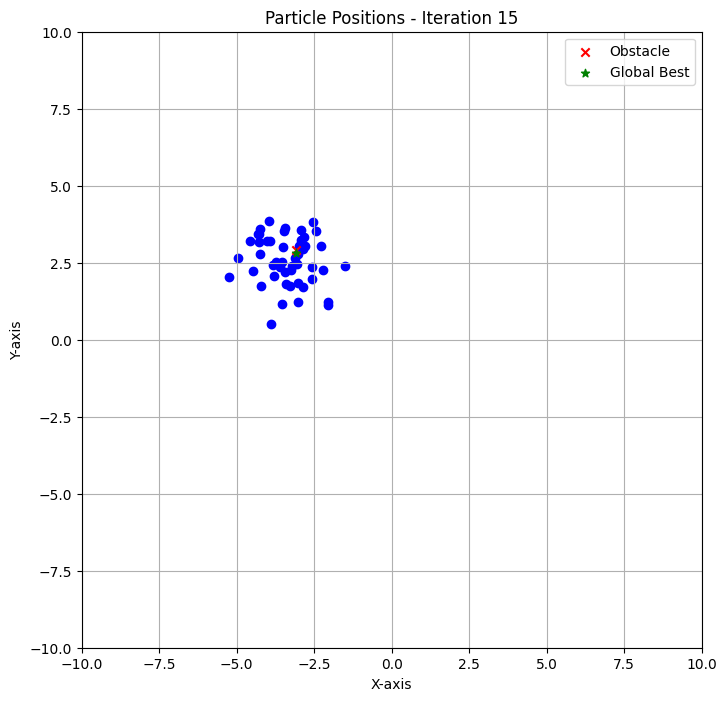

Best position: [-3.09623381  2.81894117]
Best collision penalty: 0.09271271125475733
total_distance: 0.3101040719228813


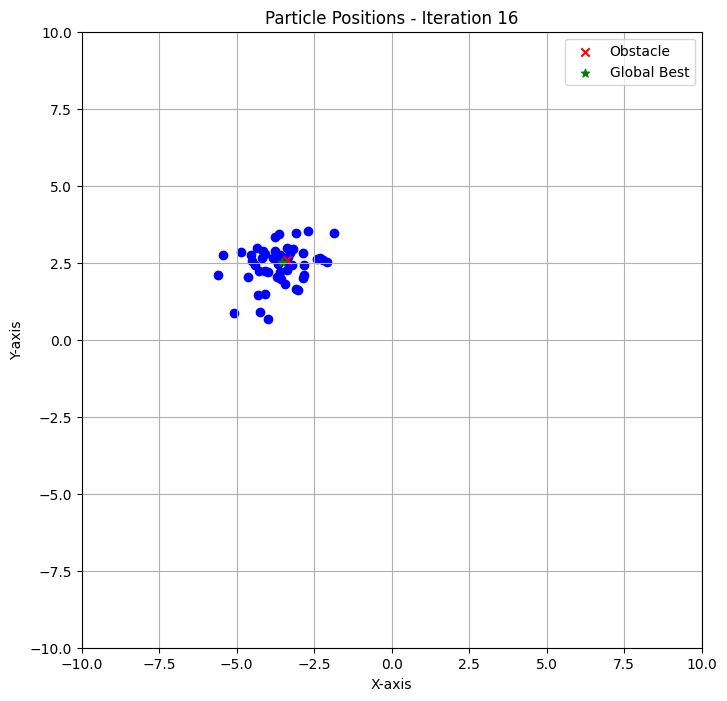

Best position: [-3.52569811  2.52000547]
Best collision penalty: 0.1778707578971913
total_distance: 1.0389387433594517


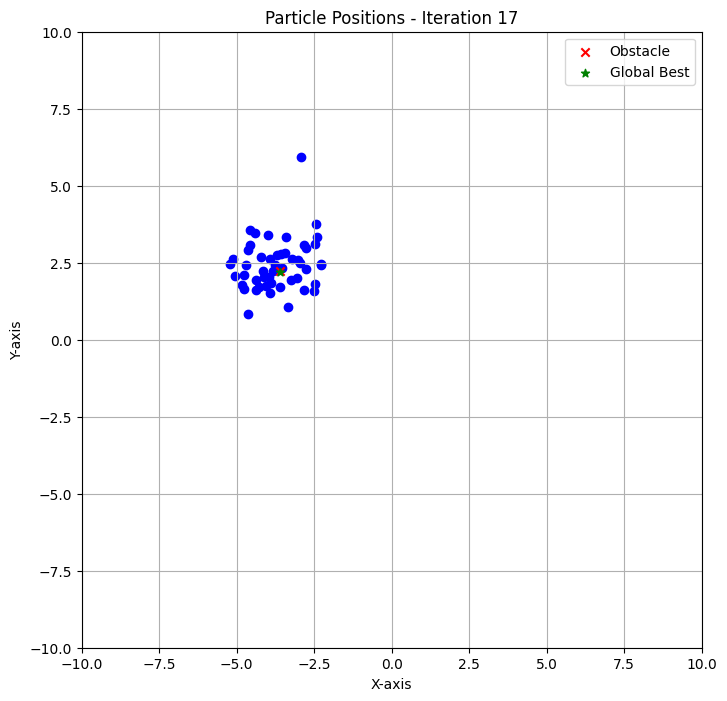

Best position: [-3.59129906  2.19840917]
Best collision penalty: 0.04318510139259306
total_distance: 1.246559935004129


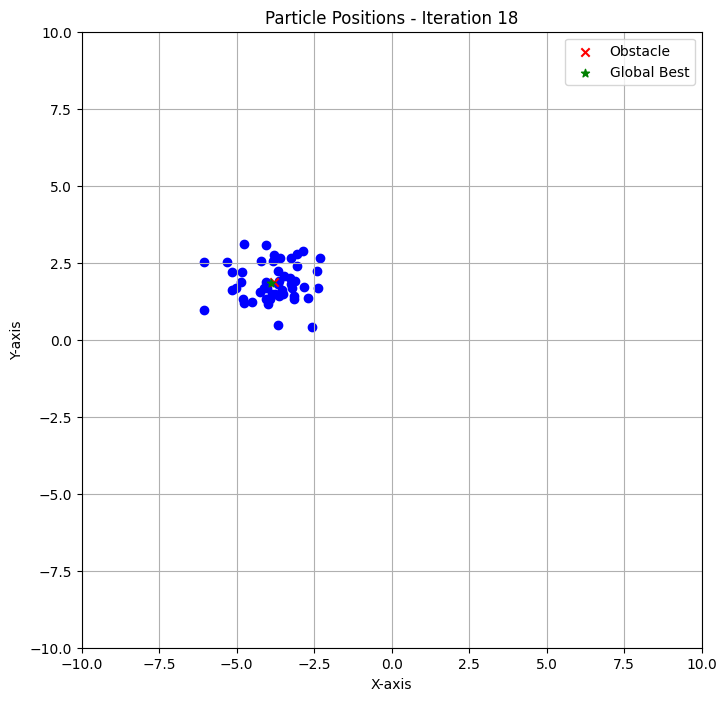

Best position: [-3.89739649  1.85163845]
Best collision penalty: 0.09031810009305073
total_distance: 1.2370640492371303


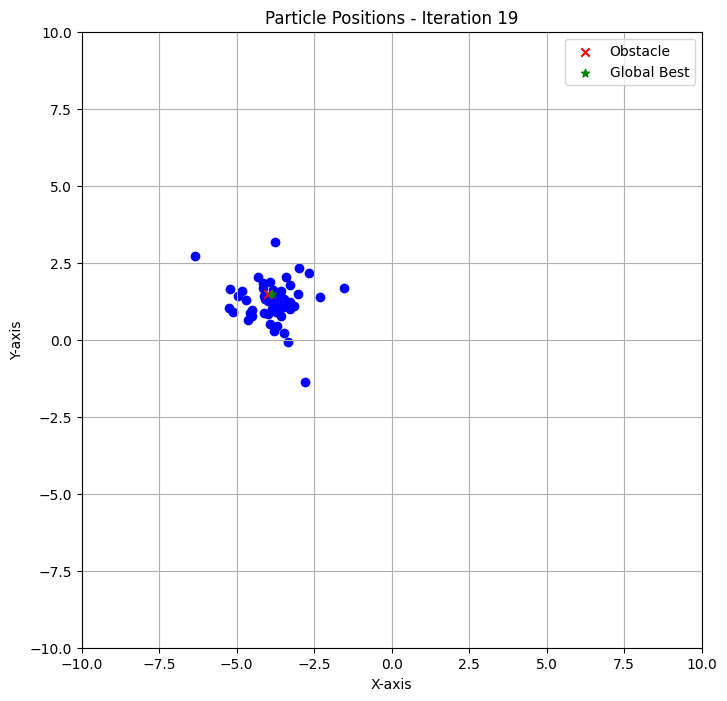

Best position: [-3.87423425  1.480464  ]
Best collision penalty: 0.10210355797586627
total_distance: 1.2821588574868972


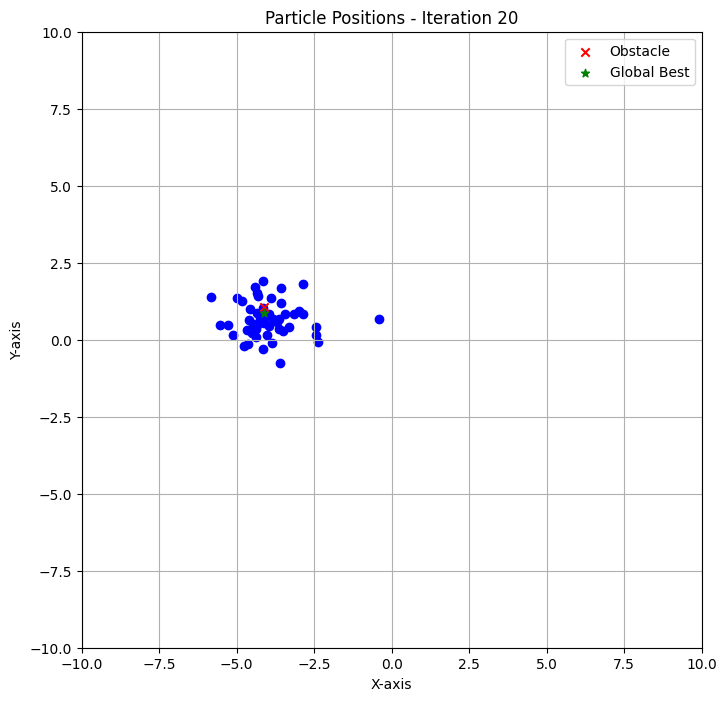

Best position: [-4.11312993  0.86632919]
Best collision penalty: 0.20895293580671218
total_distance: 0.3868034906734144


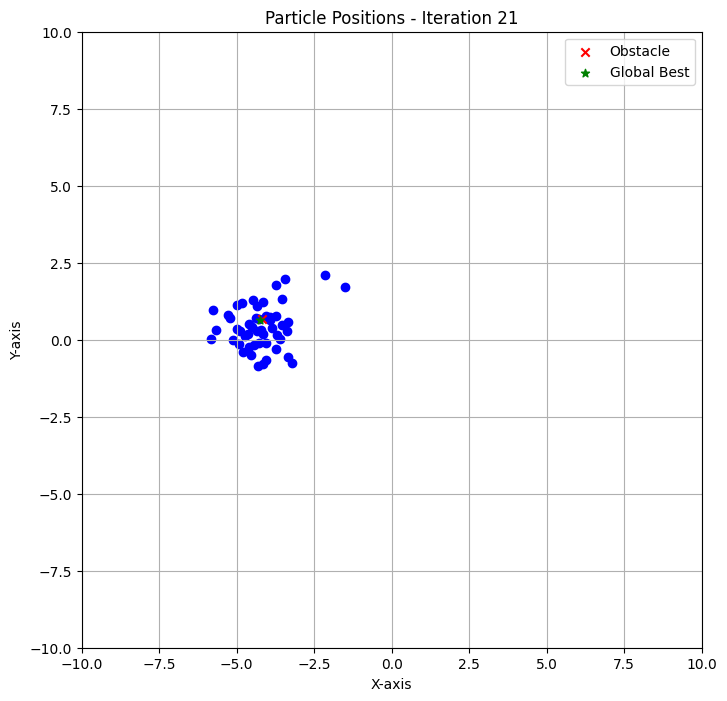

Best position: [-4.24955994  0.6290006 ]
Best collision penalty: 0.06625876096971454
total_distance: 0.4834272992551852


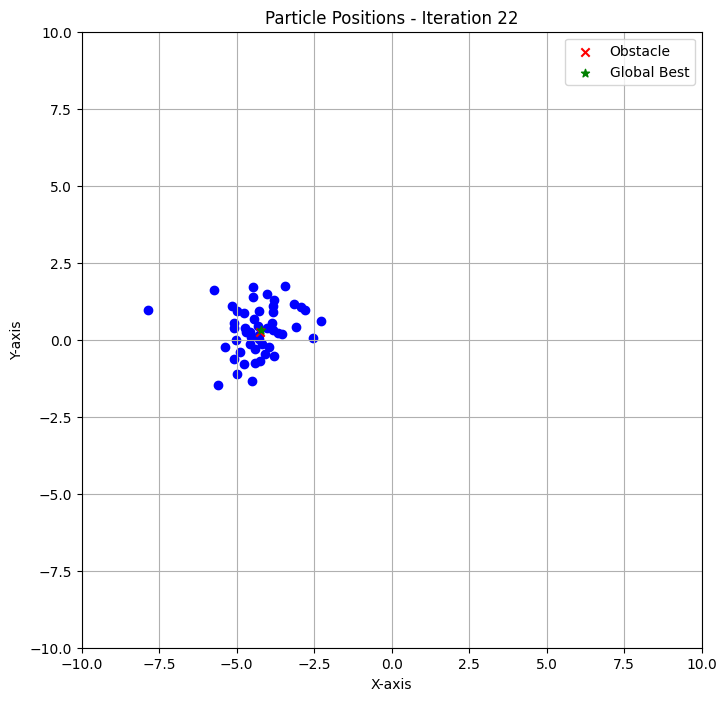

Best position: [-4.21992265  0.32493042]
Best collision penalty: 0.08811161723993903
total_distance: 0.5708731727342566


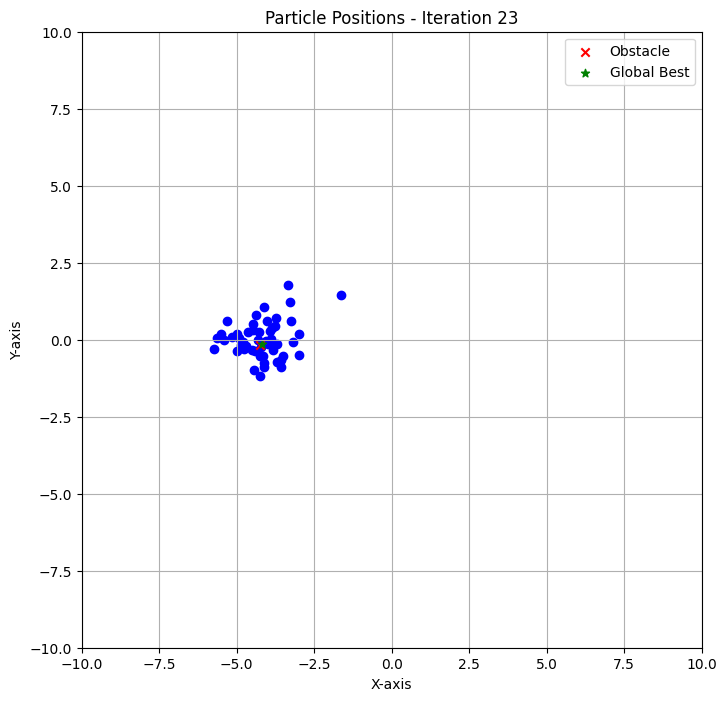

Best position: [-4.17987882 -0.12482657]
Best collision penalty: 0.08462547609733624
total_distance: 0.2298486614672834


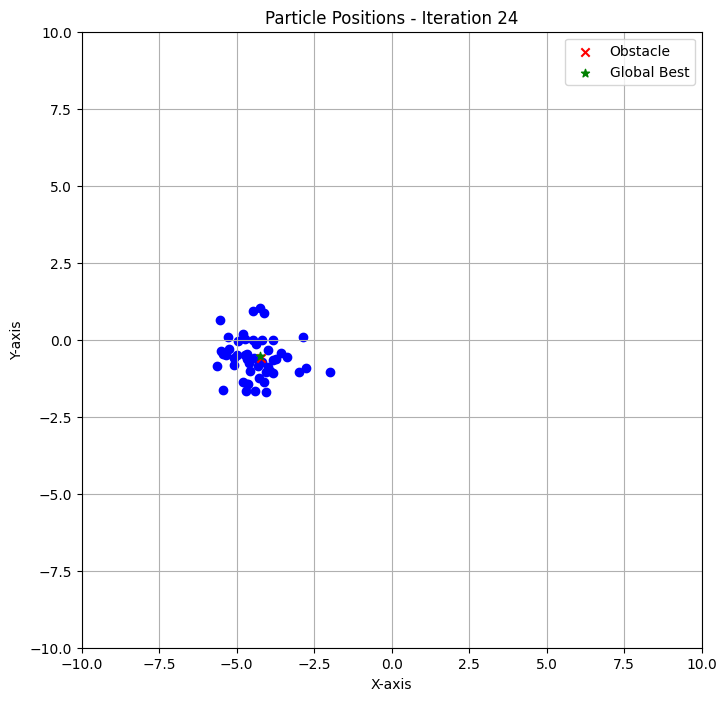

Best position: [-4.25459879 -0.53514834]
Best collision penalty: 0.09174800064293055
total_distance: 0.4443187231877738


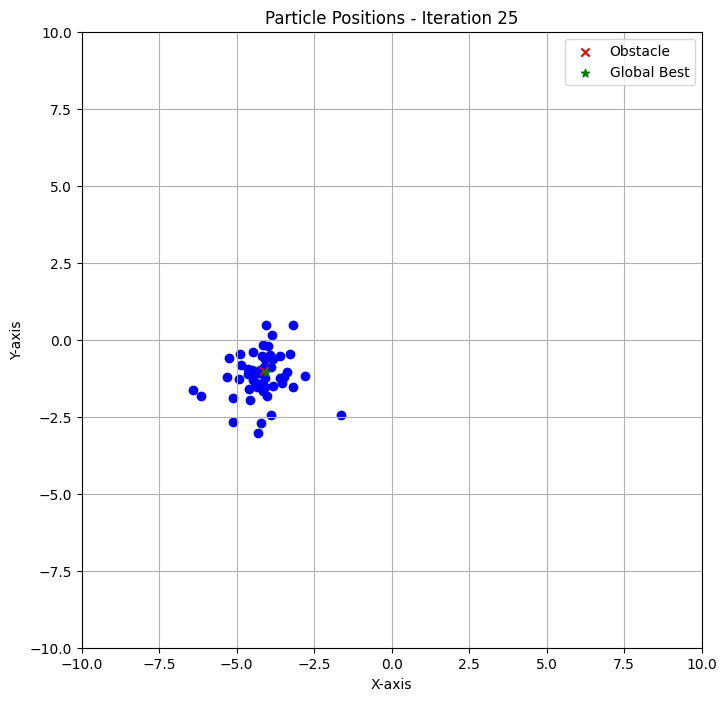

Best position: [-4.06564281 -1.03604442]
Best collision penalty: 0.052879849095105916
total_distance: 0.5187573376356012


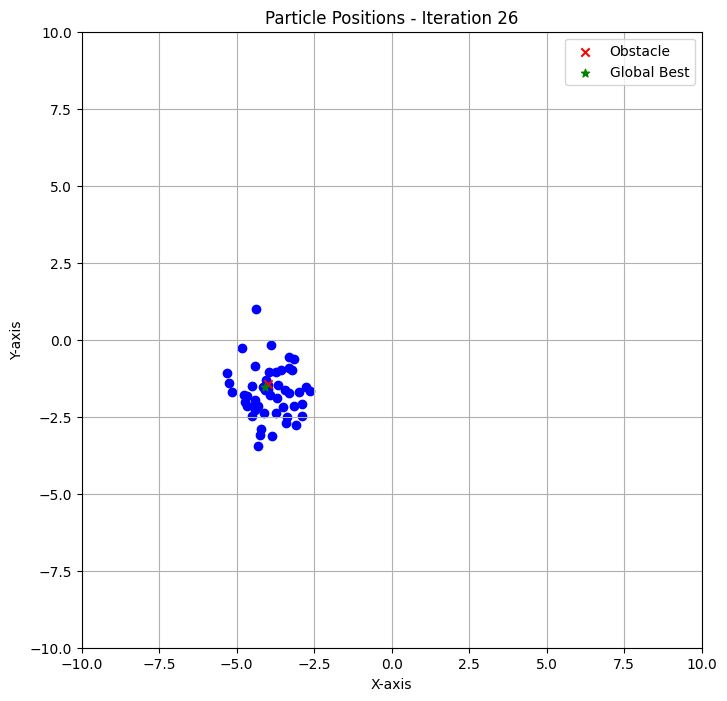

Best position: [-4.09570915 -1.54581714]
Best collision penalty: 0.15384498323090856
total_distance: 0.5048339687902953


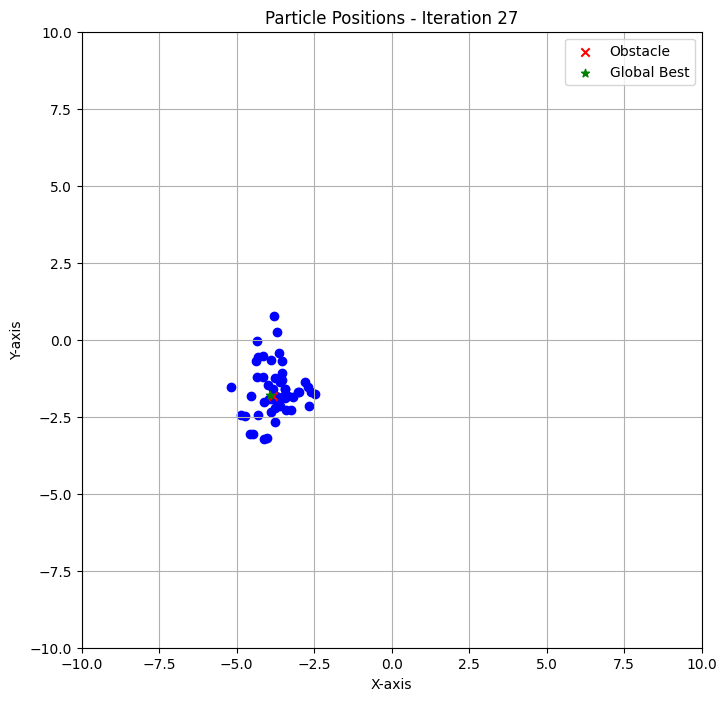

Best position: [-3.92670382 -1.79521359]
Best collision penalty: 0.09869355422656596
total_distance: 0.16591707060118696


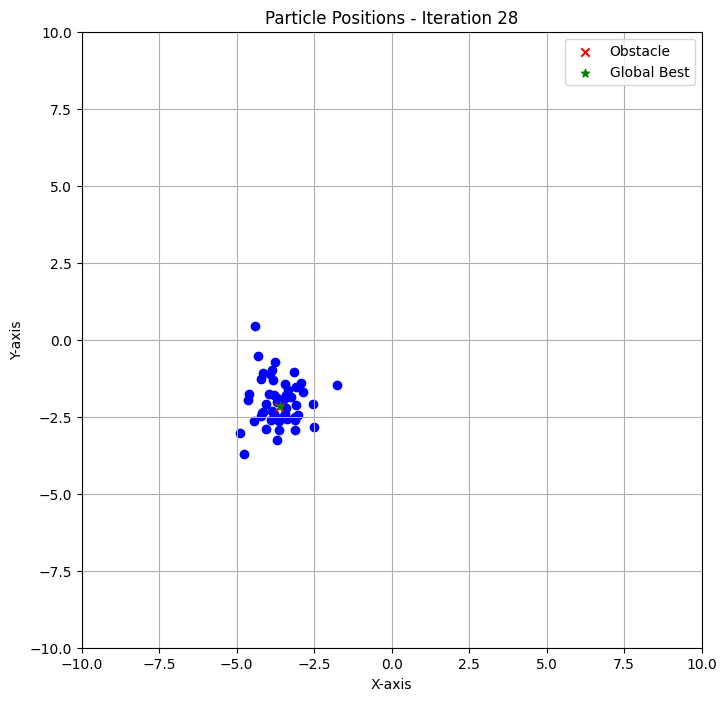

Best position: [-3.60105623 -2.1411589 ]
Best collision penalty: 0.061535888738421946
total_distance: 0.20744644273091287


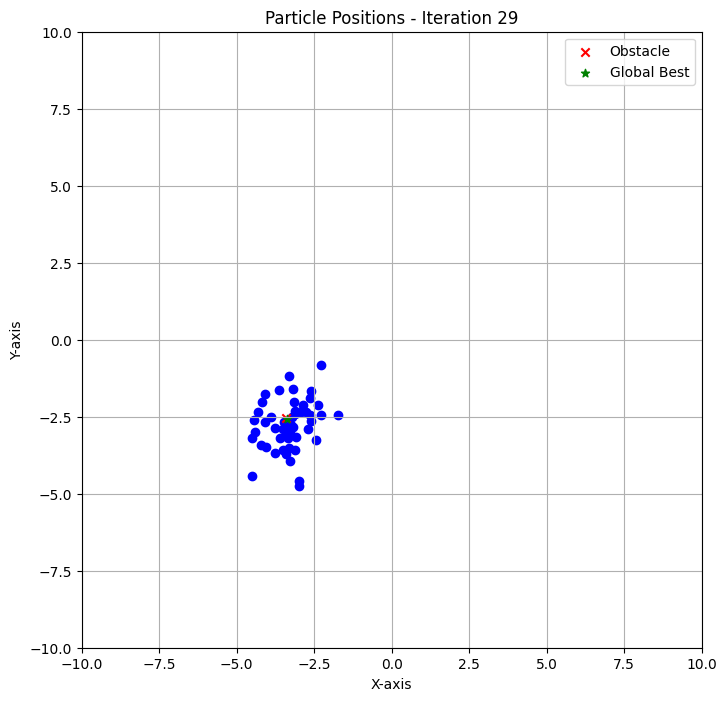

Best position: [-3.37503201 -2.55869487]
Best collision penalty: 0.02193068634090347
total_distance: 0.3038038824703075


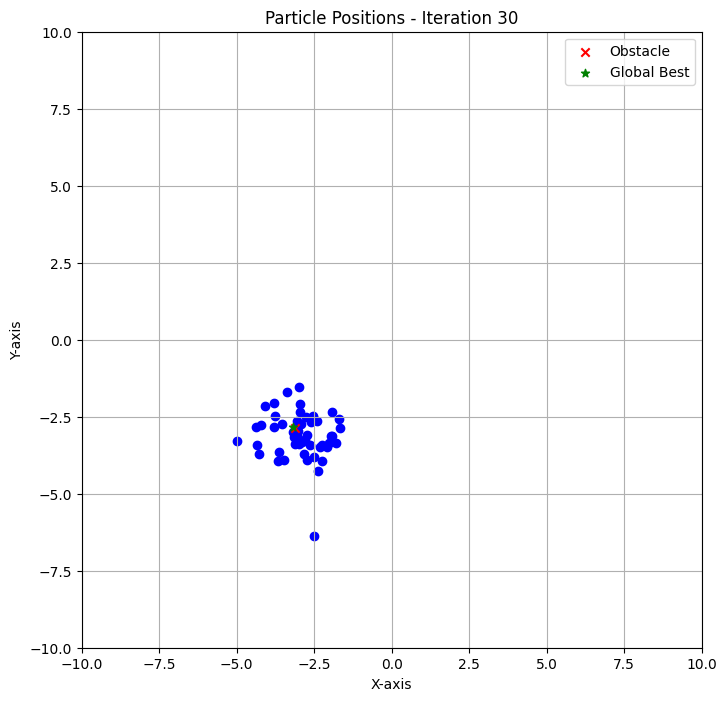

Best position: [-3.16686262 -2.83609919]
Best collision penalty: 0.05776151970591821
total_distance: 0.10329120053352019


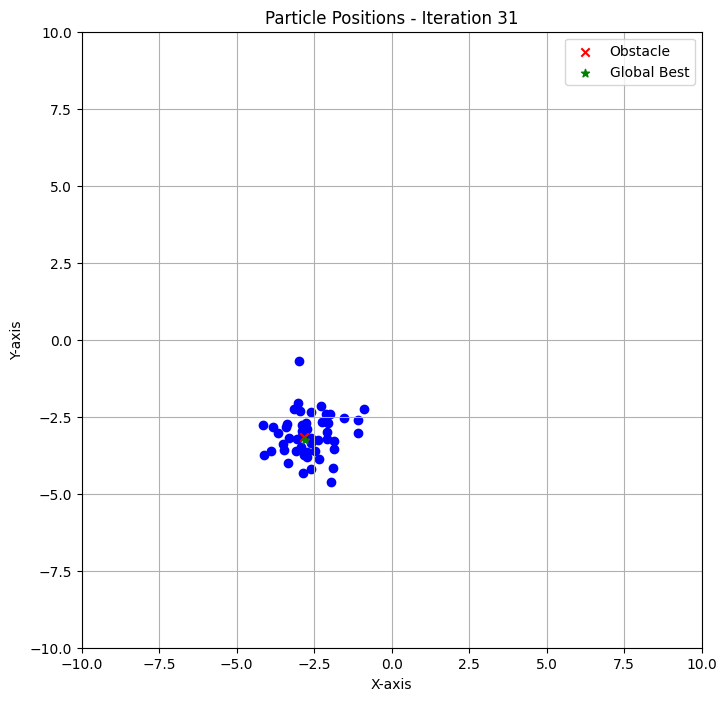

Best position: [-2.8089698  -3.26921989]
Best collision penalty: 0.09979837247543435
total_distance: 0.491634134262973


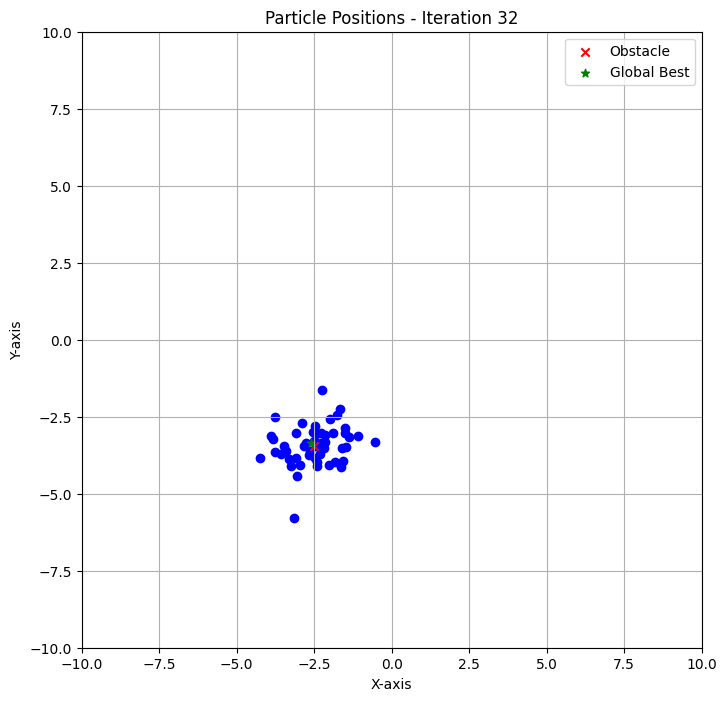

Best position: [-2.59371822 -3.36599798]
Best collision penalty: 0.12561318847687092
total_distance: 0.7112493638294696


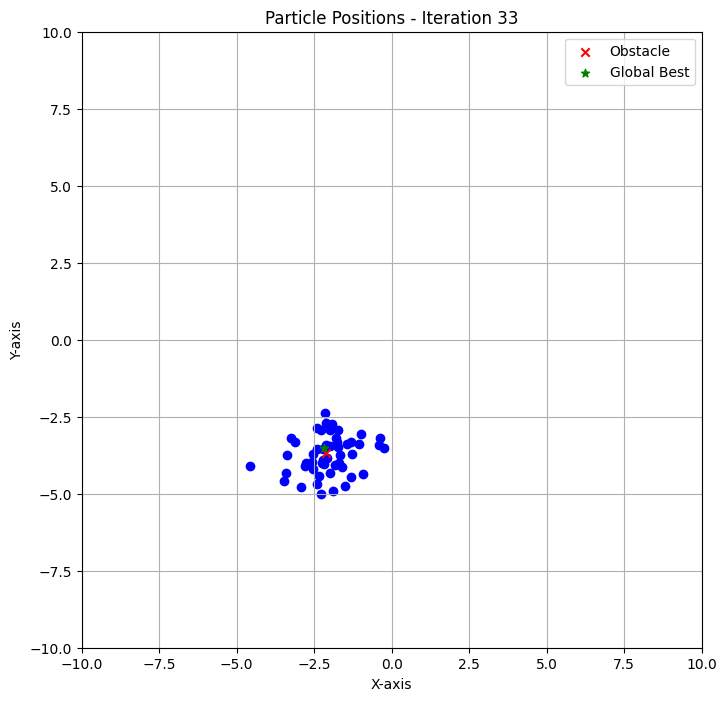

Best position: [-2.168277   -3.52201782]
Best collision penalty: 0.1490492033742064
total_distance: 0.7231294177960184


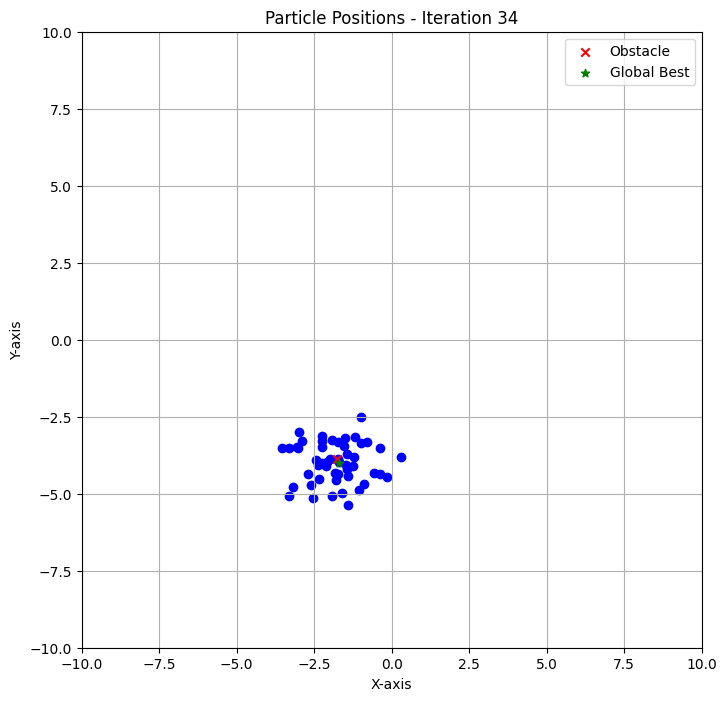

Best position: [-1.68926459 -3.98853796]
Best collision penalty: 0.14378354013867745
total_distance: 0.6621054828340022


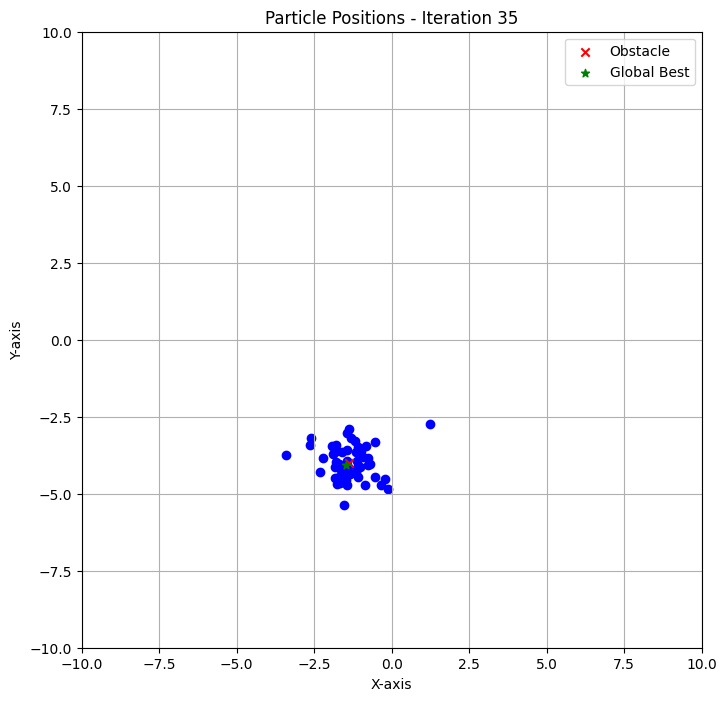

Best position: [-1.47324331 -4.08027582]
Best collision penalty: 0.12694646243063207
total_distance: 0.7870045628815138


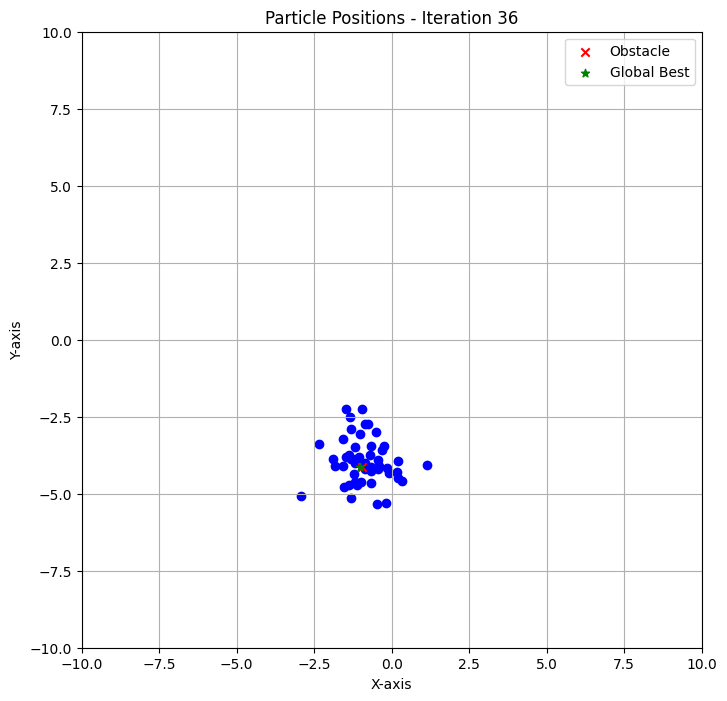

Best position: [-1.01405074 -4.12781726]
Best collision penalty: 0.0595611622987478
total_distance: 0.5563469781255072


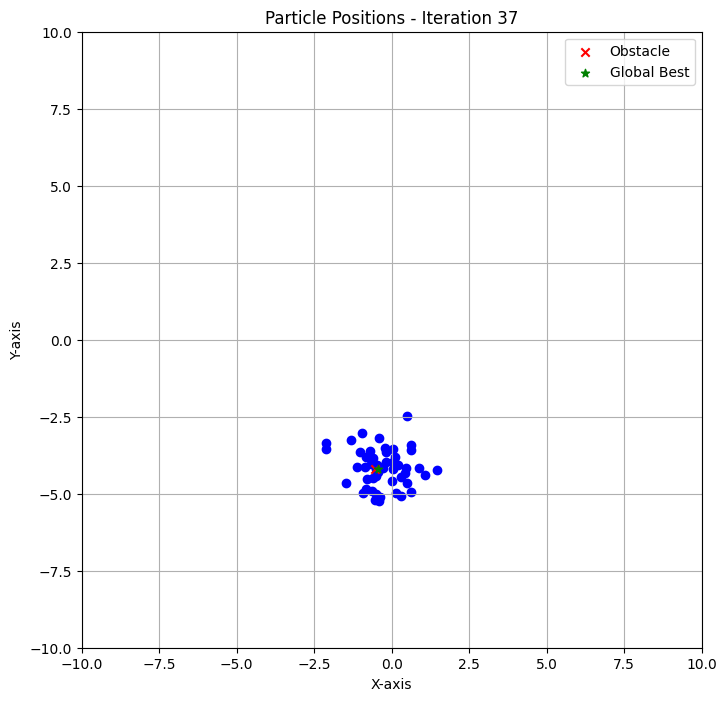

Best position: [-0.43217951 -4.18137797]
Best collision penalty: 0.10858572707833998
total_distance: 0.8778477871582355


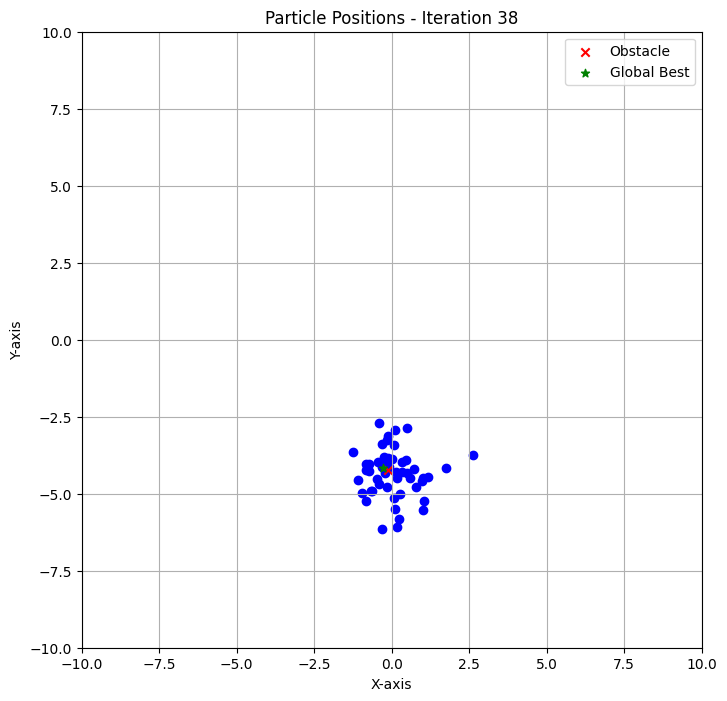

Best position: [-0.26940922 -4.17627697]
Best collision penalty: 0.16792492062830836
total_distance: 1.1344141080286851


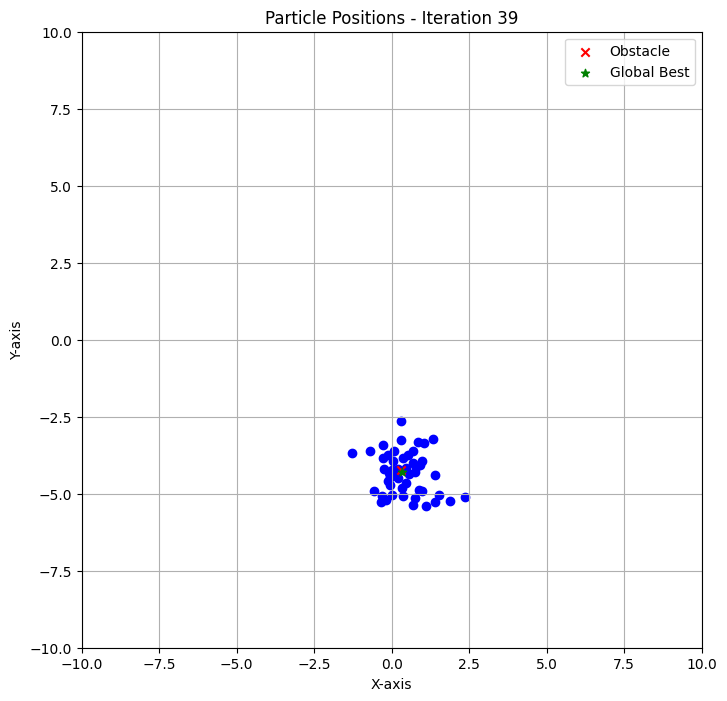

Best position: [ 0.33282116 -4.28291992]
Best collision penalty: 0.05661824616885974
total_distance: 0.21027887511064827


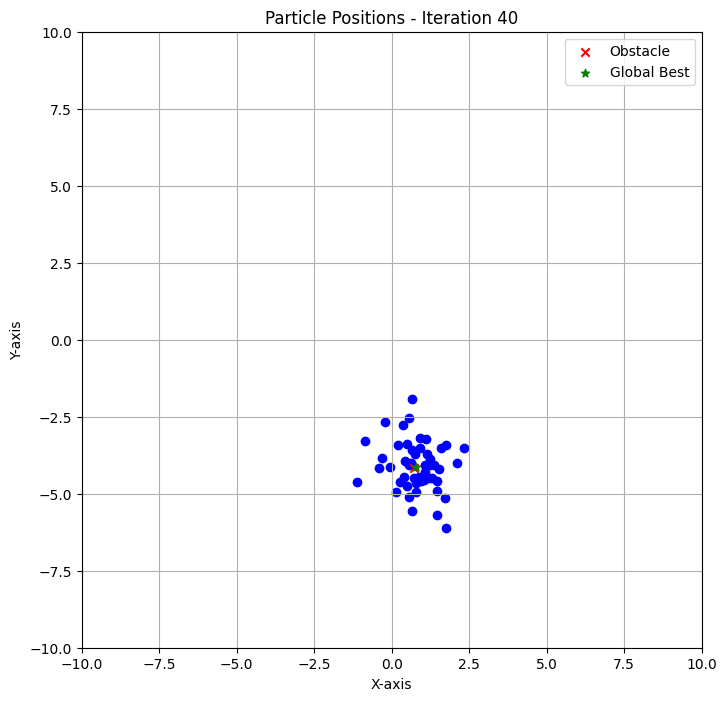

Best position: [ 0.77019704 -4.1203121 ]
Best collision penalty: 0.07118269616739498
total_distance: 1.463329216358658


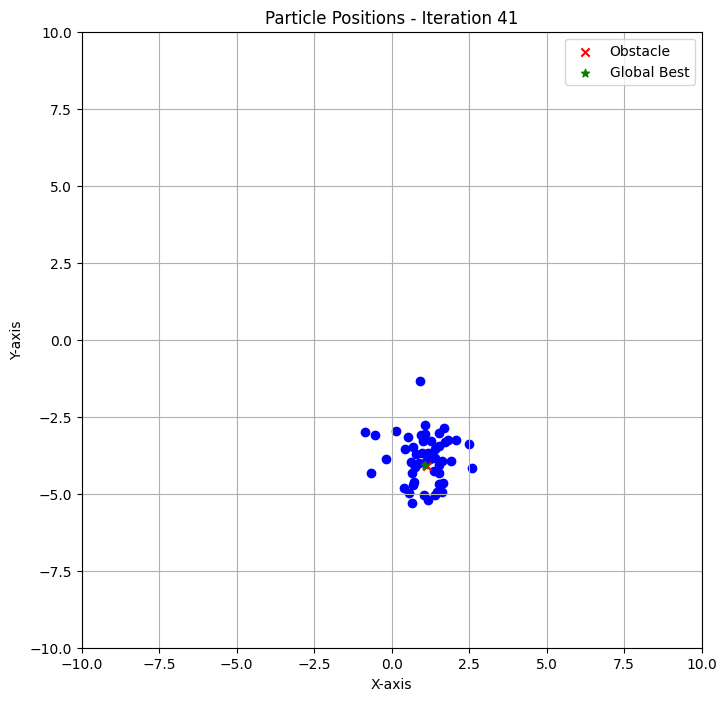

Best position: [ 1.07115447 -4.07838133]
Best collision penalty: 0.07313859741404413
total_distance: 0.1657649329949668


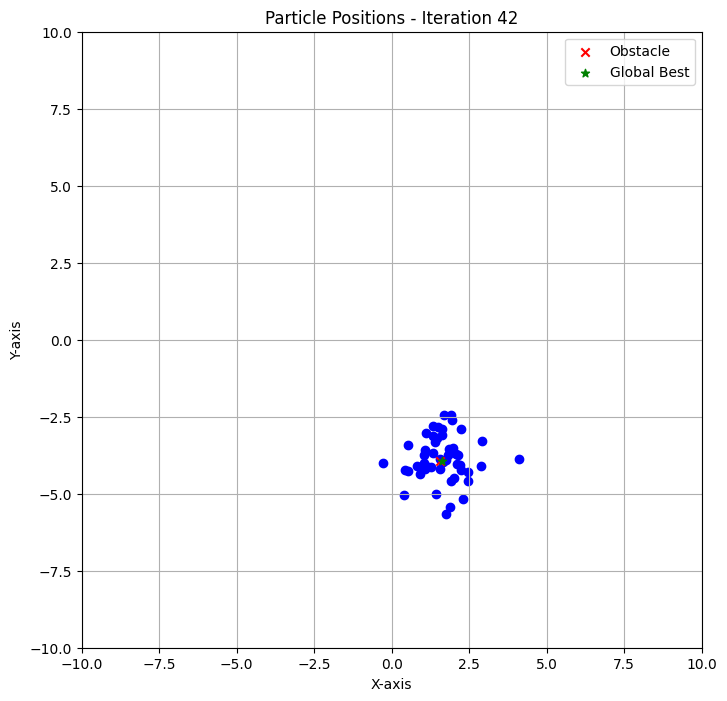

Best position: [ 1.61853332 -3.9221542 ]
Best collision penalty: 0.0779268649188928
total_distance: 0.7162903954534049


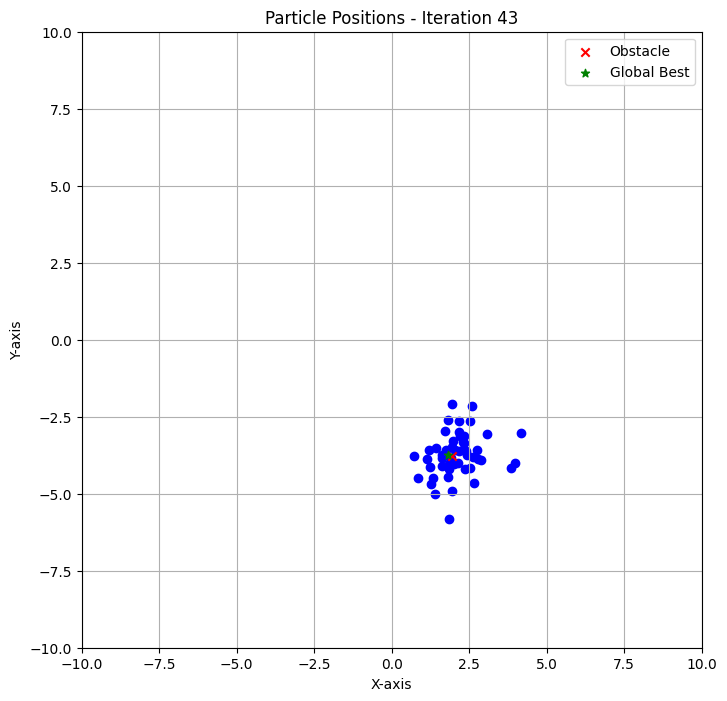

Best position: [ 1.80827867 -3.7560684 ]
Best collision penalty: 0.12624363879336684
total_distance: 0.6014114616442988


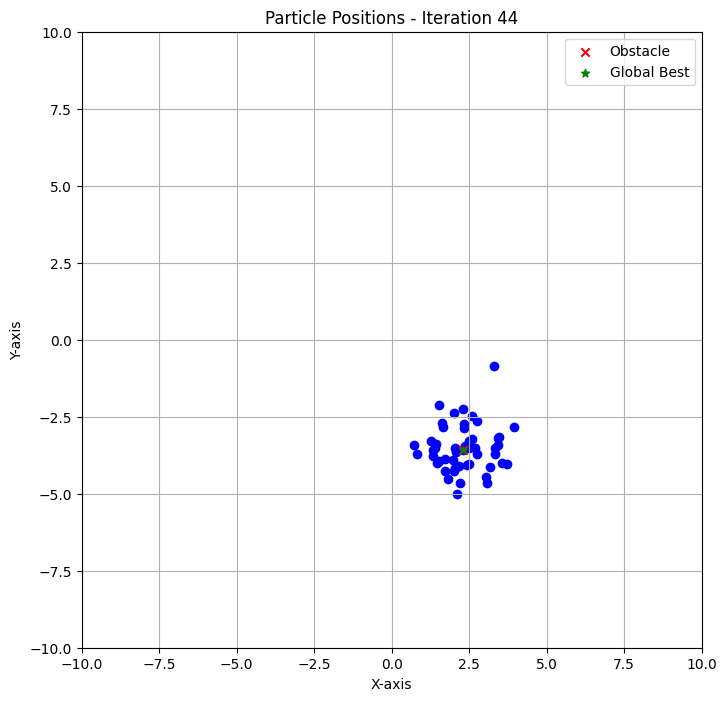

Best position: [ 2.29134589 -3.58713024]
Best collision penalty: 0.02385750156021481
total_distance: 0.49945428302541206


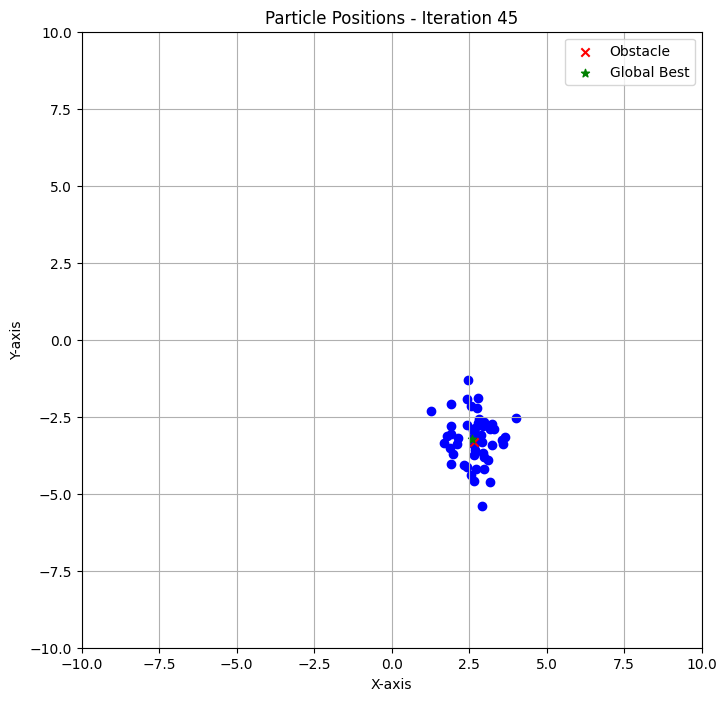

Best position: [ 2.5904235  -3.23240323]
Best collision penalty: 0.10091299508226874
total_distance: 0.44009529659433944


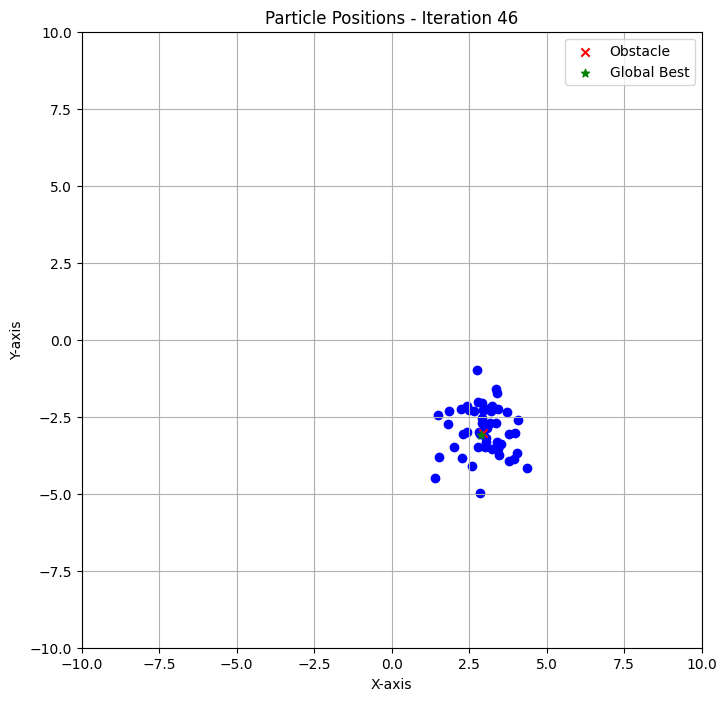

Best position: [ 2.87943889 -3.08246477]
Best collision penalty: 0.09481186414246383
total_distance: 0.4758560088702857


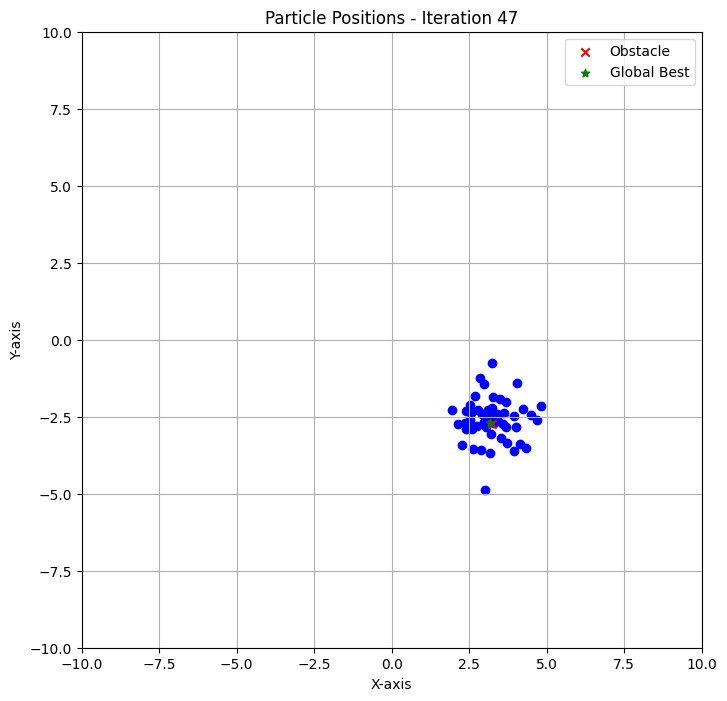

Best position: [ 3.17041951 -2.69268508]
Best collision penalty: 0.08718603788174534
total_distance: 0.5028750585499439


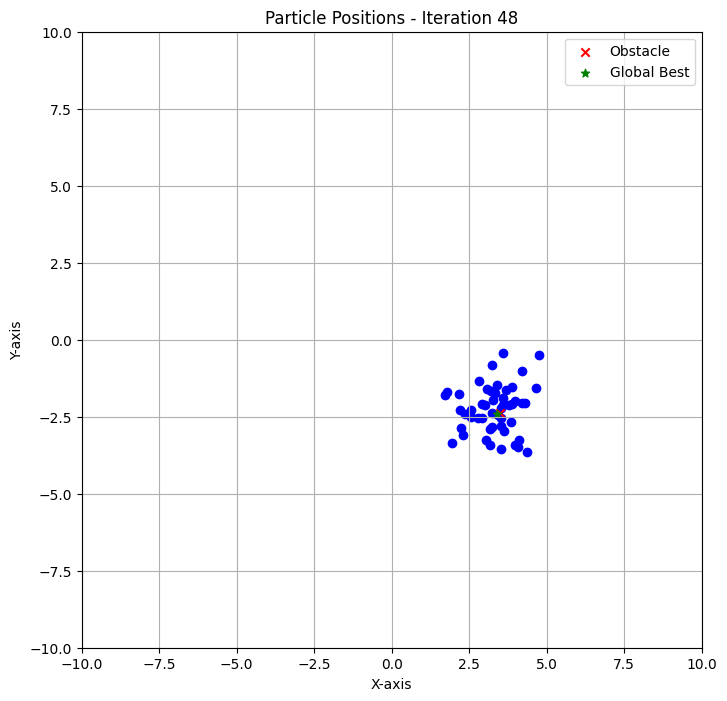

Best position: [ 3.40342266 -2.4153243 ]
Best collision penalty: 0.10706521609638447
total_distance: 0.7852853711514446


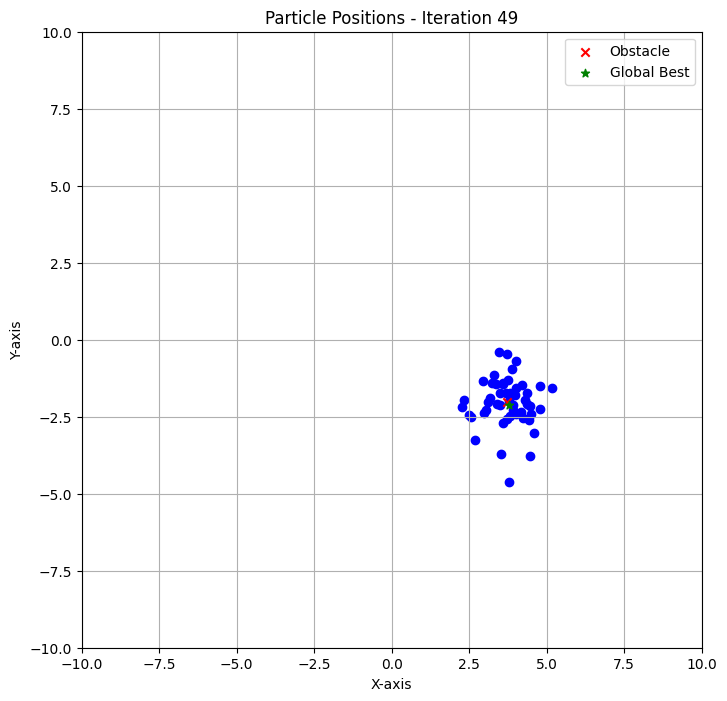

Best position: [ 3.77180398 -2.12548651]
Best collision penalty: 0.10899571019283917
total_distance: 0.3386568785572976


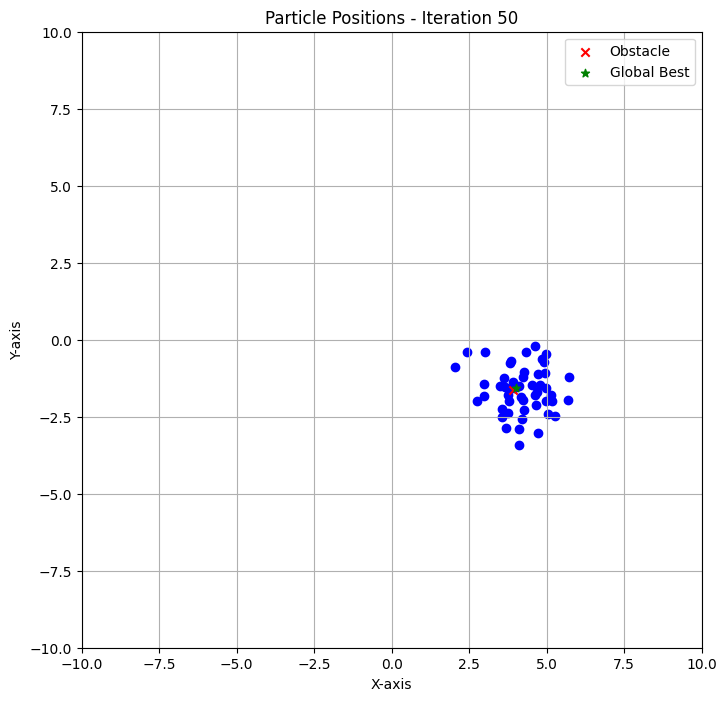

Best position: [ 4.01549705 -1.55255895]
Best collision penalty: 0.13825039236962497
total_distance: 0.33364164825685444


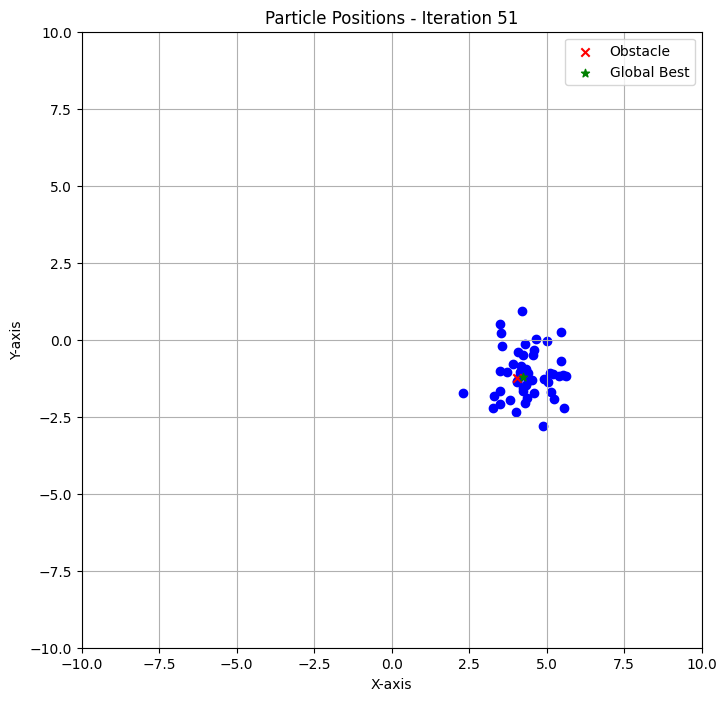

Best position: [ 4.22499835 -1.21562971]
Best collision penalty: 0.17158450948783396
total_distance: 0.20553815504847825


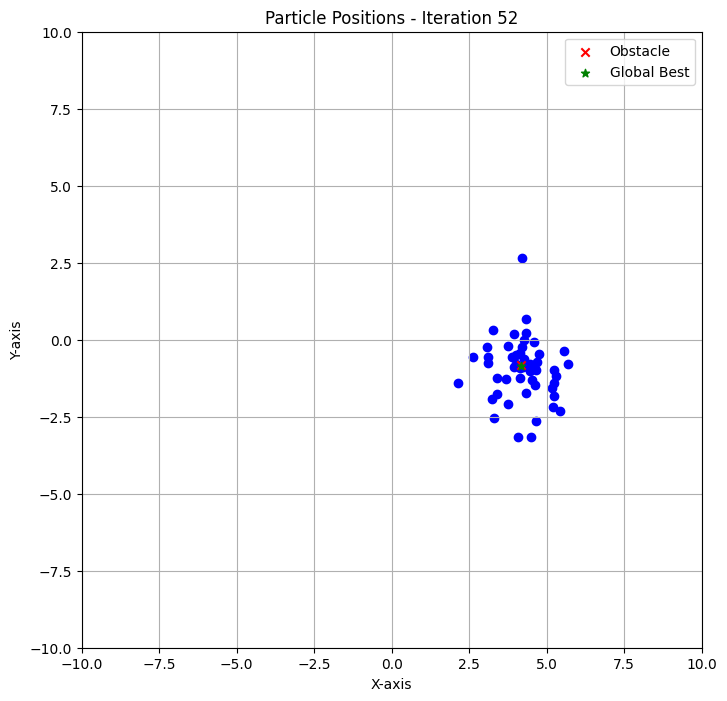

Best position: [ 4.16217308 -0.86258389]
Best collision penalty: 0.028991833400433518
total_distance: 0.40236658726250607


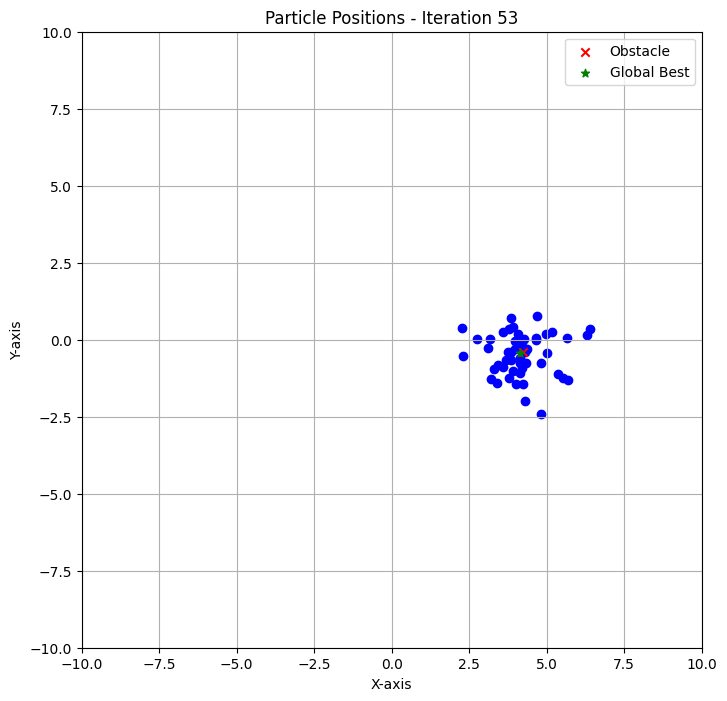

Best position: [ 4.13523871 -0.43207075]
Best collision penalty: 0.0889441405936845
total_distance: 0.8931229198967208


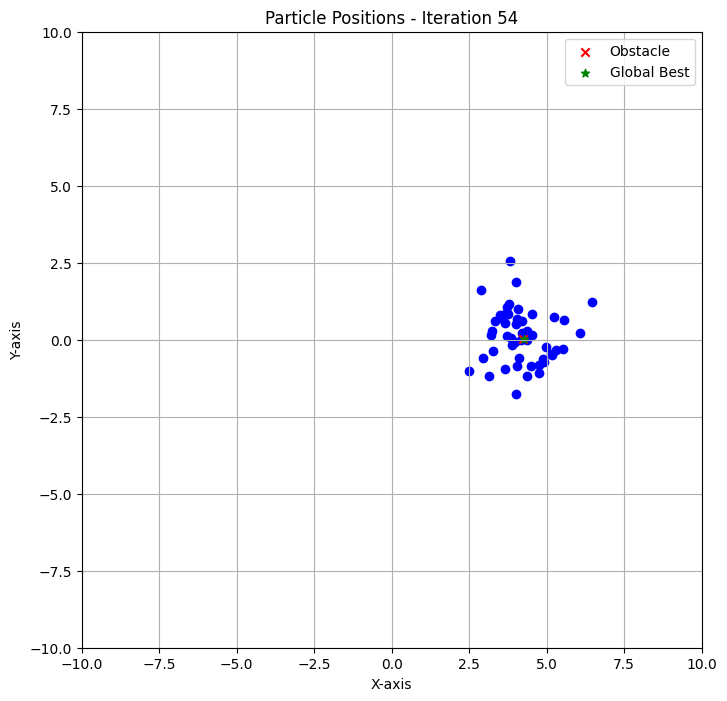

Best position: [4.25682044 0.00752249]
Best collision penalty: 0.014312282835509973
total_distance: 1.441562436222706


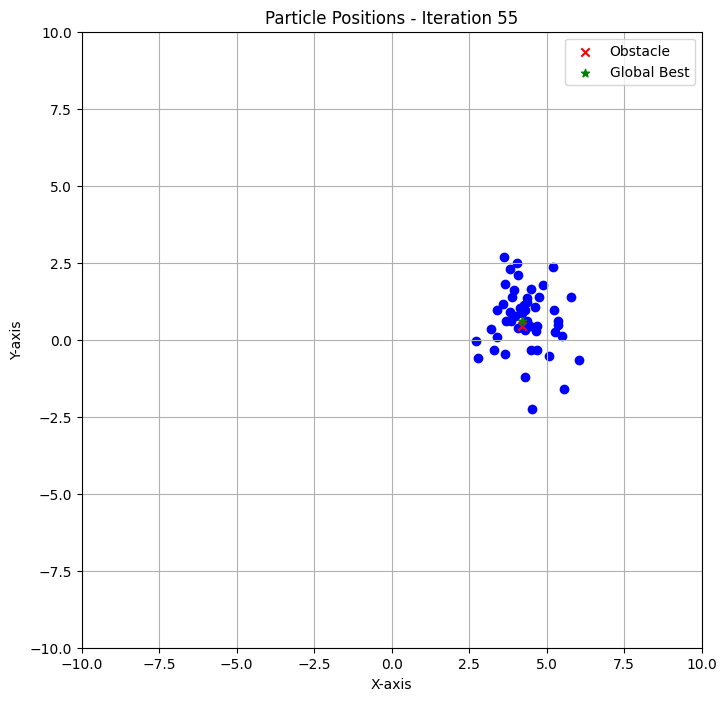

Best position: [4.19424679 0.59467132]
Best collision penalty: 0.16388959849497112
total_distance: 0.6923264776413777


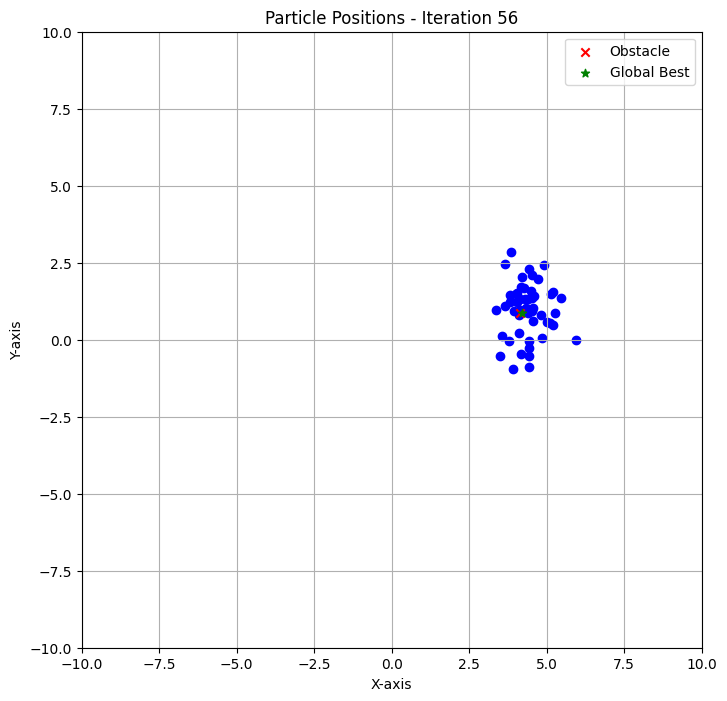

Best position: [4.20421652 0.86931973]
Best collision penalty: 0.05102172555155869
total_distance: 0.5665873967524249


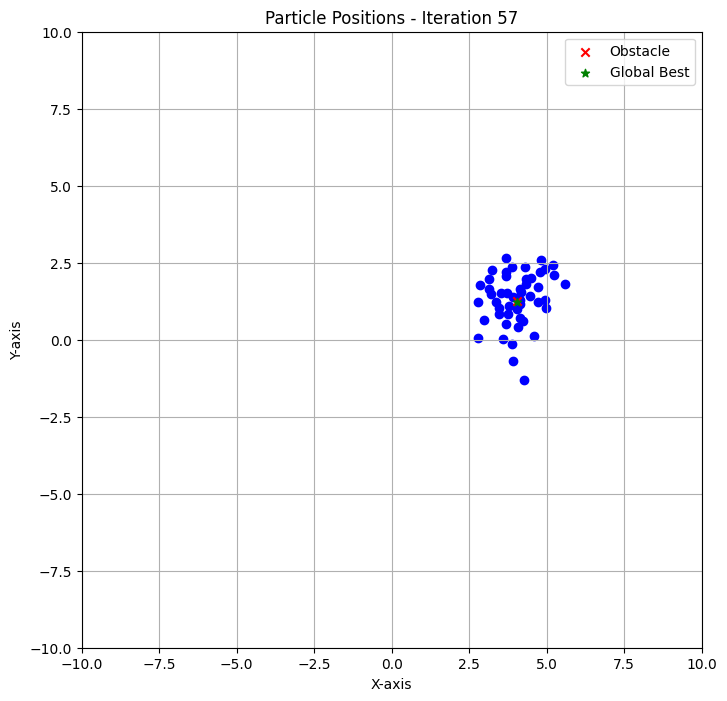

Best position: [4.04395468 1.22136201]
Best collision penalty: 0.041883482101492134
total_distance: 0.9950883789326255


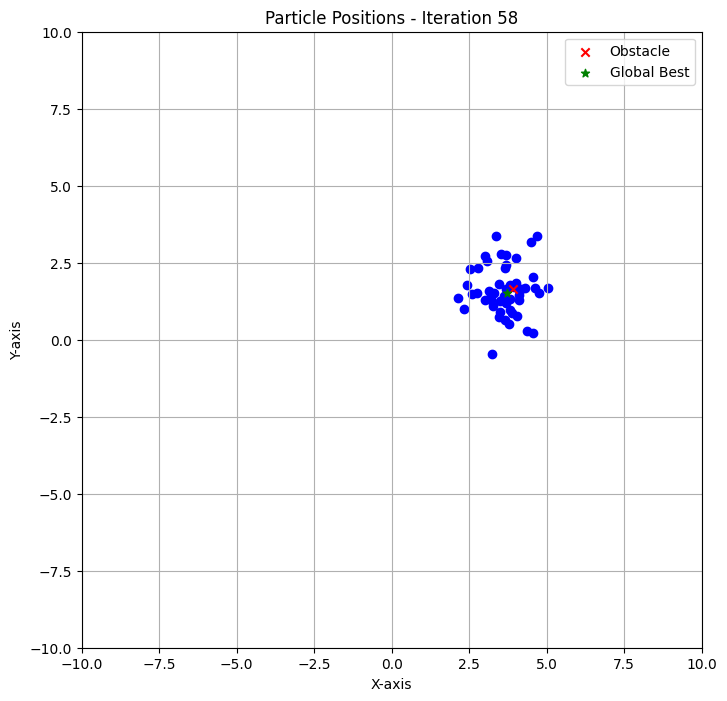

Best position: [3.73498759 1.51095641]
Best collision penalty: 0.22592466918691095
total_distance: 0.13149434805284188


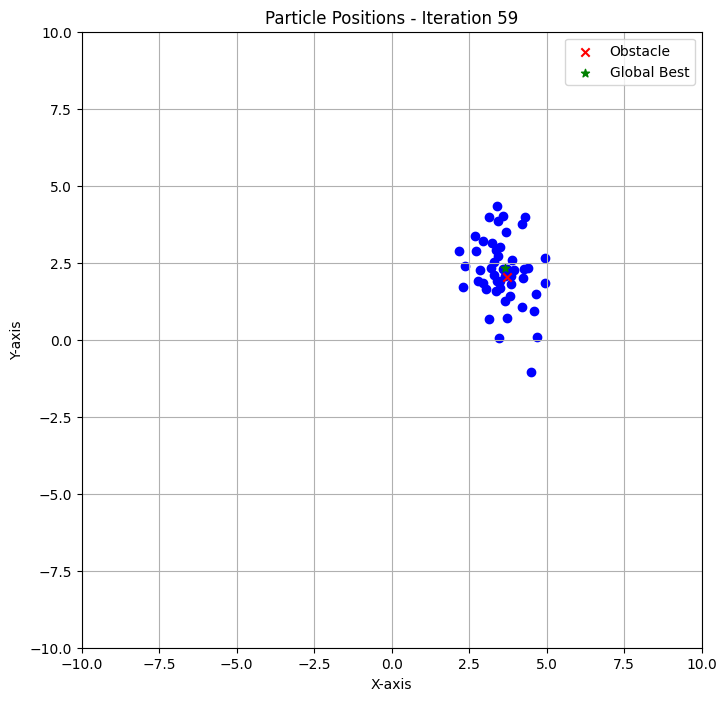

Best position: [3.64466423 2.32674786]
Best collision penalty: 0.2939738974532189
total_distance: 0.26195404599791


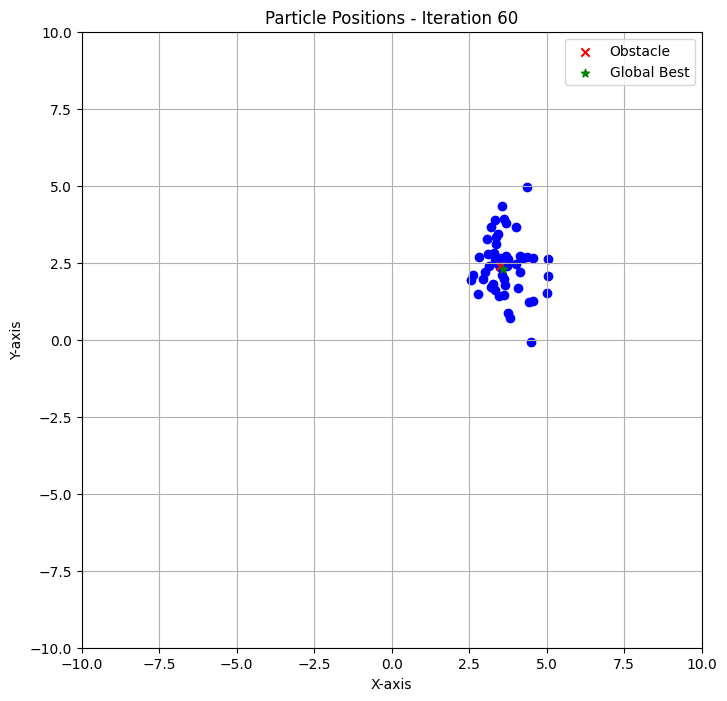

Best position: [3.593101   2.29728266]
Best collision penalty: 0.1435802002552229
total_distance: 1.3635619943086983


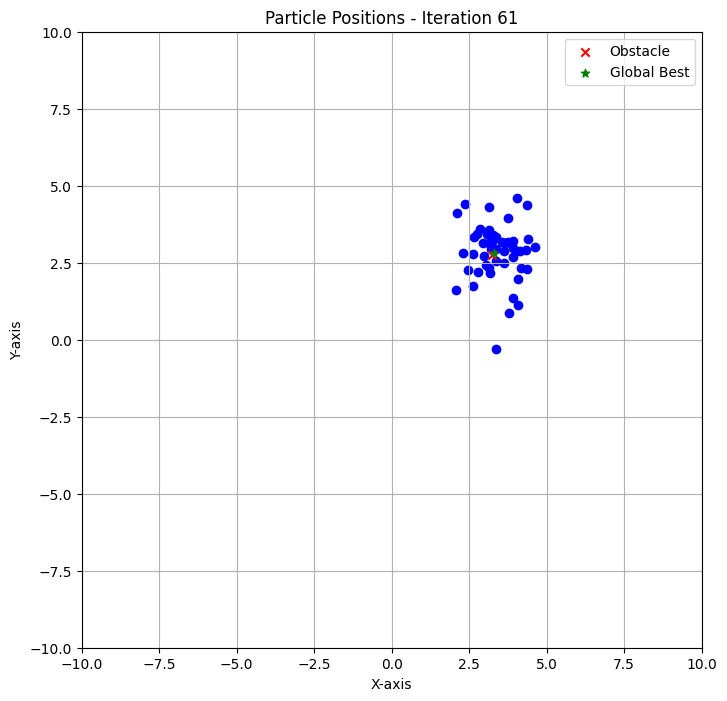

Best position: [3.3151937  2.81098594]
Best collision penalty: 0.10397049024292129
total_distance: 0.5097104603793357


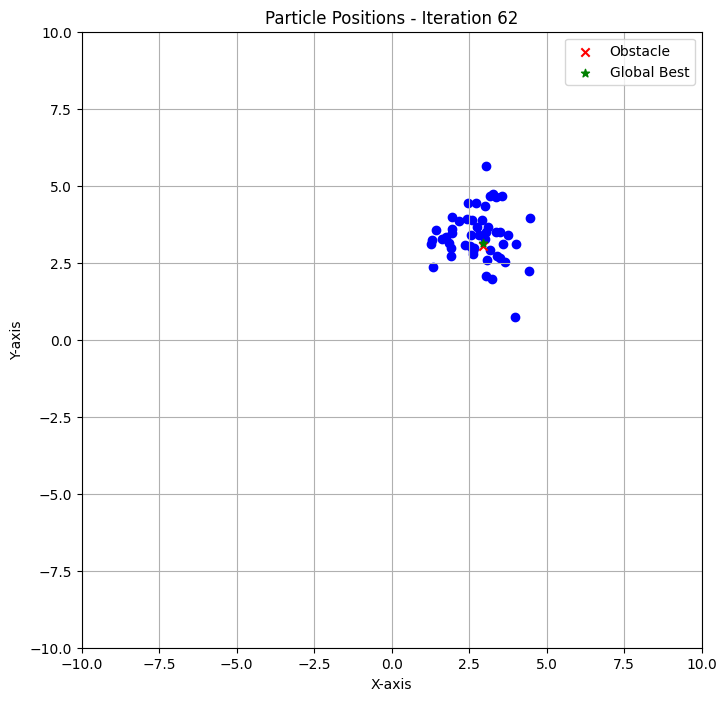

Best position: [2.95582089 3.15421922]
Best collision penalty: 0.10441592873531959
total_distance: 1.1135869384441626


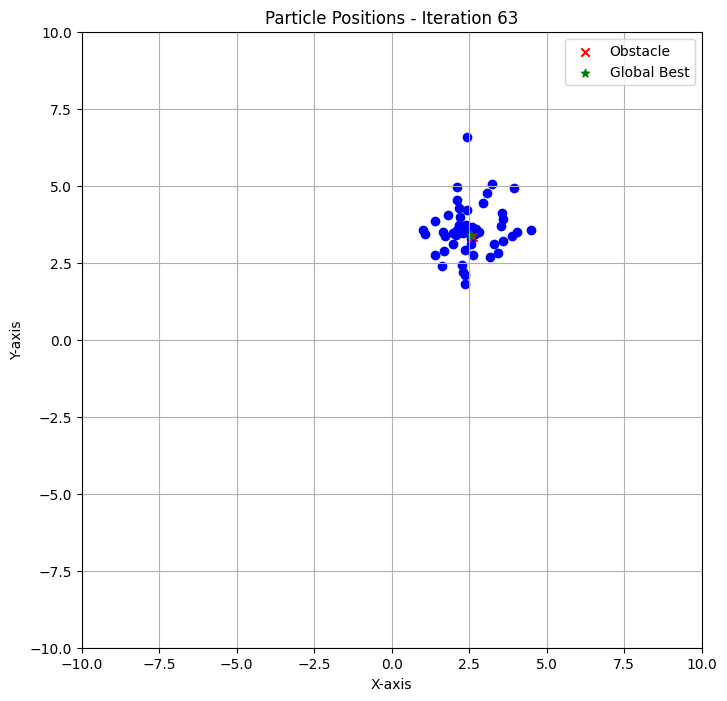

Best position: [2.56725454 3.4085774 ]
Best collision penalty: 0.10112241869203721
total_distance: 0.7864507265042616


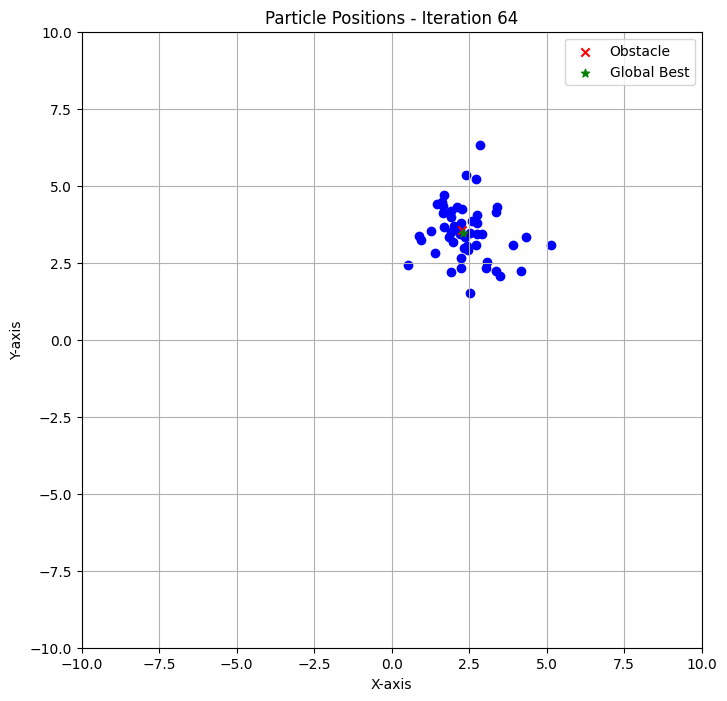

Best position: [2.31333716 3.47916139]
Best collision penalty: 0.10022869592035354
total_distance: 0.2400108811009967


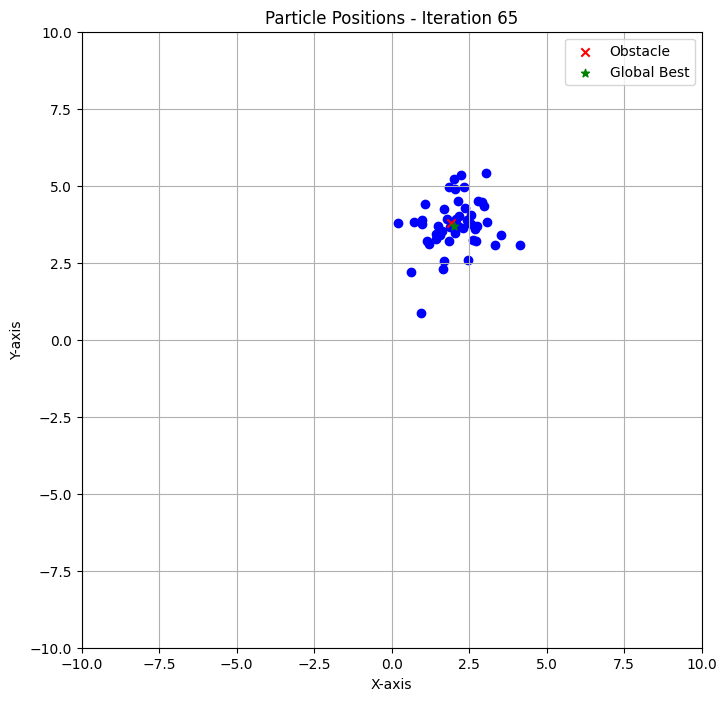

Best position: [2.01425457 3.69587791]
Best collision penalty: 0.1328145618049919
total_distance: 1.1665377720721342


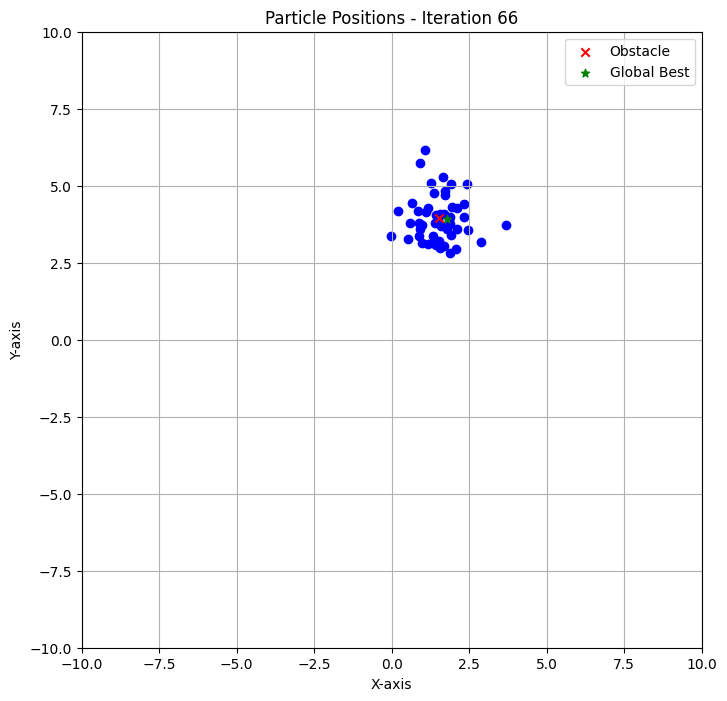

Best position: [1.7803733  3.91658819]
Best collision penalty: 0.2551079591060493
total_distance: 0.6767842178907199


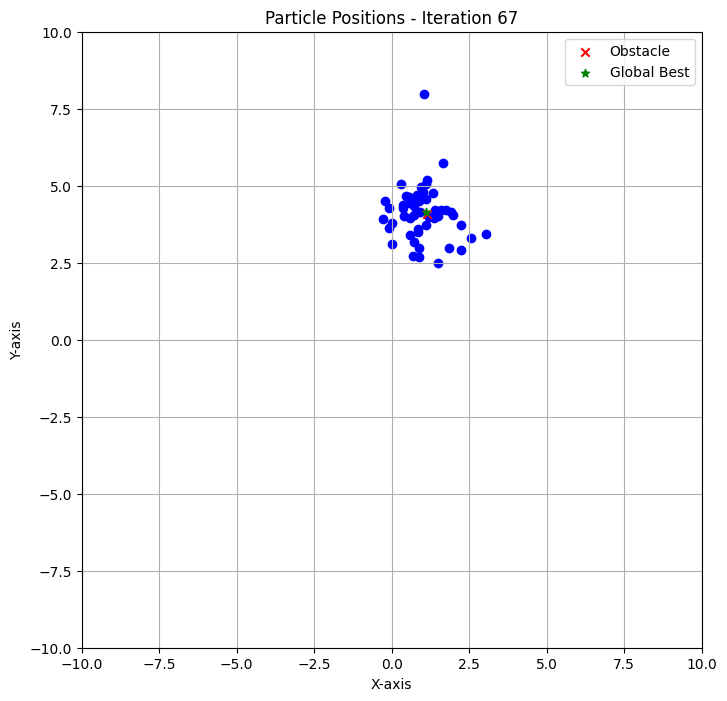

Best position: [1.12117191 4.13426496]
Best collision penalty: 0.0439821891597456
total_distance: 0.8139225240789101


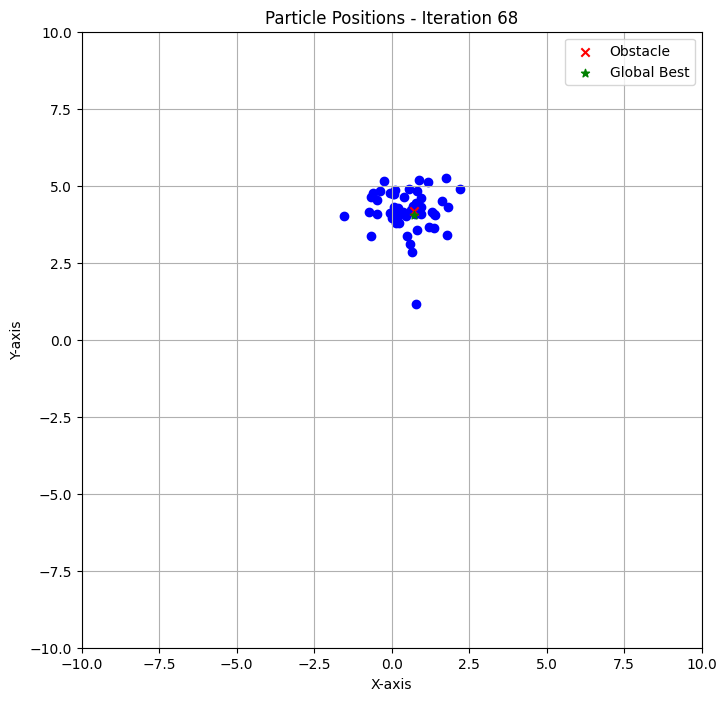

Best position: [0.70796651 4.04808929]
Best collision penalty: 0.1344615659726917
total_distance: 1.2023811290192634


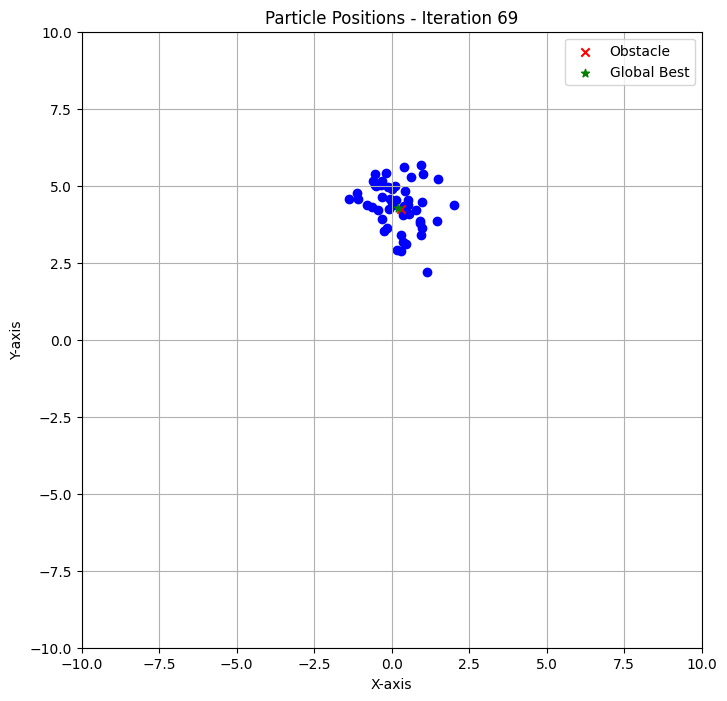

Best position: [0.21320284 4.26718708]
Best collision penalty: 0.08488084310666259
total_distance: 0.198682507790619


In [77]:

num_drones = 50
bounds = [(-10, 10), (-10, 10)]  # 2D space bounds
obstacle_position = (3, 3)  # Position of the stationary obstacle
max_iter = 70

total_distance_list = []
swarm = Swarm(num_drones, bounds, obstacle_position, max_iter)
for iteration in range(max_iter):
    best_position, best_penalty, total_distance = swarm.optimize()
    plot_particles(swarm, iteration)
    print("Best position:", best_position)
    print("Best collision penalty:", best_penalty)
    print("total_distance:", total_distance)
    total_distance_list.append(total_distance)
    # if total_distance < 0.3:
    #   break;

In [78]:
from PIL import Image
import glob
frame_folder = './Animation3'

def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frame_one = frames[0]
    frame_one.save(frame_folder+"/Convergence.gif", format="GIF", append_images=frames,
               save_all=True, duration=2000, loop=5)


make_gif(frame_folder)

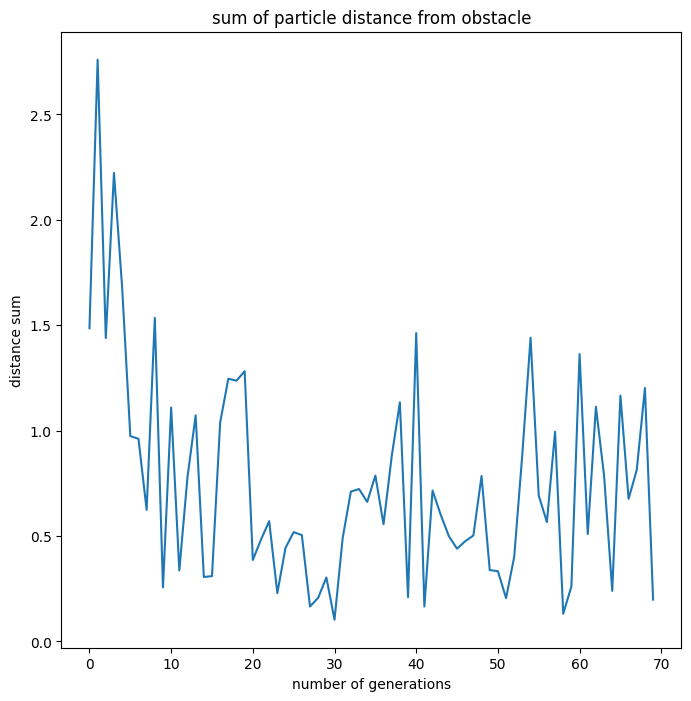

In [79]:
plt.figure(figsize=(8, 8))
plt.plot(list(range(max_iter)), total_distance_list)
plt.title('sum of particle distance from obstacle')
plt.xlabel('number of generations')
plt.ylabel('distance sum')
plt.savefig('./convergence_study.png')
plt.show()